In [2]:
%matplotlib inline
from setup import *
from analysis.util import *
from analysis.util_plot import *
from analysis.util_virtual_resection import *


<h1>Figure S??. Distribution of mean node-level control centrality in ATL vs Other type of resections </h1>

In [4]:
run_stereotype_only = False
all_nodal_results = gather_nodal_results(fconn='highgamma')
PATIENT_IDX = sorted(all_nodal_results.keys())
comp_dir = os.path.expanduser(data['COMP_DIR'])

# Collect data
# Initialize boxplot arrays
atl_pre_res = {}
atl_res = {}
other_pre_res = {}
other_res = {}

for fconn in ['alphatheta','beta','lowgamma','highgamma','veryhigh','broadband_CC']:
    # All nodal results
    all_nodal_results = gather_nodal_results(fconn=fconn)
    try:
        atl_pre_res[fconn]        
    except KeyError:
        atl_pre_res[fconn] = []
        atl_res[fconn] = []
        other_pre_res[fconn] = []
        other_res[fconn] = []
    for patient_id in PATIENT_IDX:
        if patient_id == 'HUP111A':
            continue
        if len(data['PATIENTS'][patient_id]['ELECTRODE_LABELS'].split('/')[-1].split('_')) <= 3:
            continue
        # Get outcome
        outcome = data['PATIENTS'][patient_id]['Outcome']
        outcome = get_outcome(outcome)
        type_of_resection = data['PATIENTS'][patient_id]['Resection Type']
        pre_res = []
        res = []
        
        # Get resected nodes and non-resected nodes
        first_clip_id = data['PATIENTS'][patient_id]['Events']['Ictal'].keys()[0]
        nodal_control_centrality = all_nodal_results[patient_id][first_clip_id]
        resected_node_idx, non_resected_node_idx, channels = get_resected_node_dx(patient_id)

        if type_of_resection == 'LATL' or type_of_resection == 'RATL':
            # Load event
            for clip_id in data['PATIENTS'][patient_id]['Events']['Ictal'].keys():
                if clip_id == '1000':
                    continue
                print patient_id, clip_id
                if run_stereotype_only:
                    common_stype = scipy.stats.mode(map(lambda x: x['SeizurePhenotype'], data['PATIENTS'][patient_id]['Events']['Ictal'].values()))[0][0]
                    stype = data['PATIENTS'][patient_id]['Events']['Ictal'][clip_id]['SeizurePhenotype']
                    if stype != common_stype:
                        continue
#                 stype = data['PATIENTS'][patient_id]['Events']['Ictal'][clip_id]['SeizurePhenotype']
#                 if stype not in ['A','B','C','D']:
#                     continue
#                 stype = data['PATIENTS'][patient_id]['Events']['Ictal'][clip_id]['SeizureType']
#                 if 'CPS' not in stype or stype == '??':
#                     continue
                event = data['PATIENTS'][patient_id]['Events']['Ictal'][clip_id]
                try:
                    nodal_control_centrality = all_nodal_results[patient_id][clip_id]
                except KeyError:
                    continue

                nodal_control_centrality = nodal_control_centrality[:,:nodal_control_centrality.shape[1]/2]
                mean_nodal_control_centrality = np.nanmedian(nodal_control_centrality, axis=1)
                
                pre_res.append(np.nanmedian(mean_nodal_control_centrality[resected_node_idx]))
    
                try:
                    nodal_control_centrality = all_nodal_results[patient_id][clip_id]
                except KeyError:
                    continue

                nodal_control_centrality = nodal_control_centrality[:,nodal_control_centrality.shape[1]/2:]
                mean_nodal_control_centrality = np.nanmedian(nodal_control_centrality, axis=1)
                
                res.append(np.nanmedian(mean_nodal_control_centrality[resected_node_idx]))


            atl_pre_res[fconn].append(np.nanmedian(pre_res))
            atl_res[fconn].append(np.nanmedian(res))
        elif type_of_resection == 'Other':
            # Load event
            for clip_id in data['PATIENTS'][patient_id]['Events']['Ictal'].keys():
                if clip_id == '1000':
                    continue
                print patient_id, clip_id
                if run_stereotype_only:
                    common_stype = scipy.stats.mode(map(lambda x: x['SeizurePhenotype'], data['PATIENTS'][patient_id]['Events']['Ictal'].values()))[0][0]
                    stype = data['PATIENTS'][patient_id]['Events']['Ictal'][clip_id]['SeizurePhenotype']
                    if stype != common_stype:
                        continue
#                 print patient_id, clip_id
#                 stype = data['PATIENTS'][patient_id]['Events']['Ictal'][clip_id]['SeizurePhenotype']
#                 if stype not in ['A','B','C','D']:
#                     continue
#                 stype = data['PATIENTS'][patient_id]['Events']['Ictal'][clip_id]['SeizureType']
#                 if 'CPS' not in stype or stype == '??':
#                     continue
                event = data['PATIENTS'][patient_id]['Events']['Ictal'][clip_id]
                try:
                    nodal_control_centrality = all_nodal_results[patient_id][clip_id]
                except KeyError:
                    continue

                nodal_control_centrality = nodal_control_centrality[:,:nodal_control_centrality.shape[1]/2]
                mean_nodal_control_centrality = np.nanmedian(nodal_control_centrality, axis=1)

                pre_res.append(np.nanmedian(mean_nodal_control_centrality[resected_node_idx]))

                try:
                    nodal_control_centrality = all_nodal_results[patient_id][clip_id]
                except KeyError:
                    continue
                
                nodal_control_centrality = nodal_control_centrality[:,nodal_control_centrality.shape[1]/2:]
                mean_nodal_control_centrality = np.nanmedian(nodal_control_centrality, axis=1)
                
                res.append(np.nanmedian(mean_nodal_control_centrality[resected_node_idx]))
                
            other_pre_res[fconn].append(np.nanmedian(pre_res))
            other_res[fconn].append(np.nanmedian(res))
            

HUP064 1
HUP065 1
HUP065 3
HUP065 2
HUP068 1
HUP068 3
HUP068 2
HUP068 5
HUP068 4
HUP070 1
HUP070 3
HUP070 2
HUP070 5
HUP070 4
HUP070 7
HUP070 6
HUP070 8
HUP073 1
HUP073 3
HUP073 2
HUP073 5
HUP073 4
HUP075 5
HUP078 1
HUP078 3
HUP078 2
HUP078 5
HUP078 4
HUP080 1
HUP080 3
HUP080 2
HUP080 4
HUP082 1
HUP082 2
HUP082 5
HUP082 4
HUP082 7
HUP082 6
HUP083 11
HUP083 25
HUP083 13
HUP083 12
HUP083 15
HUP083 14
HUP083 22
HUP083 16
HUP083 19
HUP083 18
HUP083 23
HUP083 7
HUP083 9
HUP083 20
HUP086 1
HUP086 2
HUP087 1
HUP087 2
HUP088 1
HUP088 3
HUP088 2
HUP094 1
HUP094 3
HUP094 2
HUP105 1
HUP105 2
HUP106 1
HUP106 3
HUP106 2
HUP106 4
HUP107 1
HUP107 3
HUP107 2
HUP107 5
HUP107 4
HUP107 7
HUP107 6
HUP111B 11
HUP111B 12
HUP111B 15
HUP111B 21
HUP111B 17
HUP111B 16
HUP111B 19
HUP111B 18
HUP111B 22
HUP111B 20
Study012 24
Study012 25
Study012 26
Study012 27
Study012 20
Study012 21
Study012 22
Study012 23
Study012 28
Study012 1
Study012 3
Study012 2
Study012 5
Study012 4
Study012 7
Study012 6
Study012 9
Study01

Alpha/Theta:
 5-15 Hz pre 0.134742013909 0.892815853775 -0.405466186398
Alpha/Theta:
 5-15 Hz post -0.997090902927 0.318720388274 -0.751826333621
Beta:
 15-25 Hz pre -0.997090902927 0.318720388274 -0.606448185209
Beta:
 15-25 Hz post -2.23671743089 0.0253048140213 -0.972927242742
Low Gamma:
 30-40 Hz pre -0.835400486236 0.403492256147 -0.535677838996
Low Gamma:
 30-40 Hz post -2.02113020864 0.043266287957 -0.932702827943
High Gamma:
 95-105 Hz pre -1.10488451405 0.269209633438 -0.0916328512404
High Gamma:
 95-105 Hz post -2.77568548653 0.00550854675898 -0.976108186396
Very High:
 105-256+ Hz pre 0.188638819473 0.850375905459 0.149397591741
Very High:
 105-256+ Hz post -2.6678918754 0.00763288178779 -1.45797066886
Broadband
 Cross-Correlation pre -0.0808452083454 0.935565054651 -0.342510054161
Broadband
 Cross-Correlation post -1.64385256969 0.100206659424 -0.947421521868


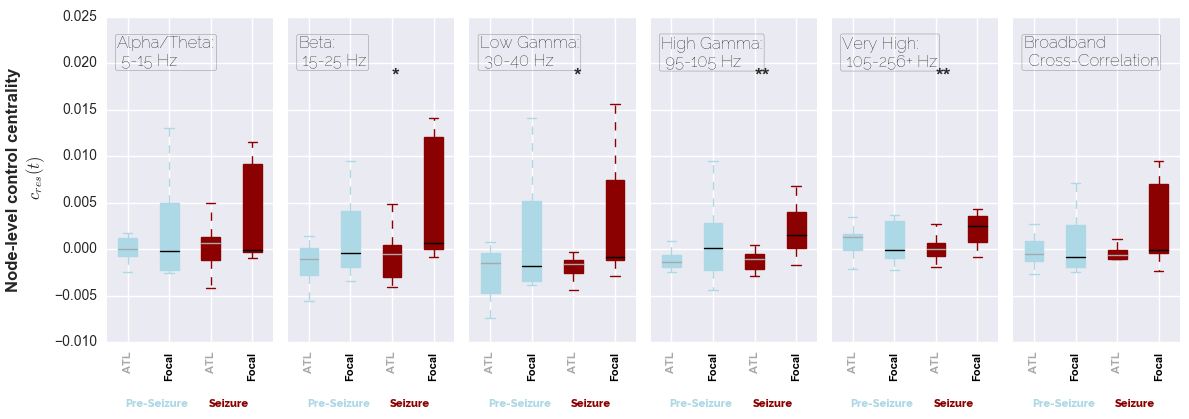

In [5]:
# Figure font options
font1 = {'family':'raleway',
        'color': 'lightblue',
        'weight':'bold',
        'size':8,
        }
font2 = {'family':'raleway',
        'color': 'darkred',
        'weight':'bold',
        'size':8,
        }

max_y = 0.025
# max_y = 3.0
min_y = -0.01
# min_y = -3.0
star_y = 0.018


# Make function to change boxplot colors
def draw_plot(data, edge_color, fill_color):
    bp = ax.boxplot(data, patch_artist=True)
#     print bp['boxes']
    for element in ['boxes','whiskers','fliers','medians','caps']:
        for i in range(len(bp[element])):                
            if element is 'medians':
                plt.setp(bp[element][i], color=fill_color[i][1])
            elif element is 'whiskers' or element is 'caps':
                plt.setp(bp[element][i], color=edge_color[i/2])
            else:
                plt.setp(bp[element][i], color=edge_color[i])
    for i,patch in enumerate(bp['boxes']):
        patch.set(hatch=fill_color[i][0])

fig,axs = plt.subplots(1,6,sharey=True)
# fig.set_figwidth(2.75591)
fig.set_size_inches((12,4))
# fig.suptitle('Resection ',fontdict={'family':'raleway','size':18,'color':'black'})
for ax, fconn in zip(axs,['alphatheta','beta','lowgamma','highgamma','veryhigh','broadband_CC']):
    if(fconn == 'alphatheta'):
        title = 'Alpha/Theta:\n 5-15 Hz'
        ax.set_ylabel('Node-level control centrality\n $c_{res}(t)$',fontdict={'size':12,'weight':'bold'})
    if(fconn == 'beta'):
        title = 'Beta:\n 15-25 Hz'
    if(fconn == 'lowgamma'):
        title = 'Low Gamma:\n 30-40 Hz'
    if(fconn == 'highgamma'):
        title = 'High Gamma:\n 95-105 Hz'
    if(fconn == 'veryhigh'):
        title = 'Very High:\n 105-256+ Hz'
    if(fconn == 'broadband_CC'):
        title = 'Broadband\n Cross-Correlation'


    draw_plot([atl_pre_res[fconn],other_pre_res[fconn],atl_res[fconn],other_res[fconn]],
              ['lightblue','lightblue','darkred','darkred'],
              [('/','darkgray'),('/','black'),('/','darkgray'),('/','black')])
    s,pre_p = scipy.stats.ranksums(atl_pre_res[fconn], other_pre_res[fconn])
    cd = cohen_d(atl_pre_res[fconn], other_pre_res[fconn])
    print title, 'pre', s,pre_p, cd
    s,post_p = scipy.stats.ranksums(atl_res[fconn], other_res[fconn])
    cd = cohen_d(atl_res[fconn], other_res[fconn])
    print title, 'post',s,post_p, cd

    ax.text(0.95,min_y-(max_y-min_y)*0.2,'Pre-Seizure',fontdict=font1)
    ax.text(2.95,min_y-(max_y-min_y)*0.2,'Seizure',fontdict=font2)
    ax.text(0.75, max_y-(max_y-min_y)*0.15,title, \
            fontdict={'family':'raleway','size':12,'color':'black'}, \
            bbox=dict(facecolor='none',edgecolor='gray',boxstyle='round,pad=0.1'))
    ax.set_ylim([min_y,max_y])
    ax.set_xticks([1,2,3,4])
    ax.set_xticklabels(['ATL','Focal','ATL','Focal'],fontdict={'size':8,'weight':'bold'},rotation='vertical')
    for ii in range(1,4,2):
        ax.get_xticklabels()[ii].set_color('black')
    for ii in range(0,4,2):
        ax.get_xticklabels()[ii].set_color('darkgray')
    
    if pre_p < 0.001:
        ax.text(1.0,star_y,'***',{'weight':'bold', 'size':14})
    elif pre_p < 0.01:
        ax.text(1.0,star_y,'**',{'weight':'bold', 'size':14})
    elif pre_p < 0.05:
        ax.text(1.0,star_y,'*',{'weight':'bold', 'size':14})
    elif pre_p < 0.1:
        ax.text(1.0,star_y,'p=%0.2f'%pre_p,{'weight':'normal', 'size':12})
    
    if post_p < 0.001:
        ax.text(3.0,star_y,'***',{'weight':'bold', 'size':14})
    elif post_p < 0.01:
        ax.text(3.0,star_y,'**',{'weight':'bold', 'size':14})
    elif post_p < 0.05:
        ax.text(3.0,star_y,'*',{'weight':'bold', 'size':14})
    elif post_p < 0.1:
        ax.text(3.0,star_y,'p=%0.2f'%post_p,{'weight':'normal', 'size':12})
        
plt.tight_layout()
# plt.show()
if run_stereotype_only:
    blah
#     fig.savefig('%s/../fig/FigureS??.png'%(comp_dir))
else:
#     blah
    fig.savefig('%s/../fig/FigureSresection1.png'%(comp_dir))



<h1>Figure S??. Distribution of mean node-level control centrality in ATL vs Other type of resections RESTRICTED TO NON-LESIONAL </h1>

In [12]:
run_stereotype_only = False
all_nodal_results = gather_nodal_results(fconn='highgamma')
PATIENT_IDX = sorted(all_nodal_results.keys())
comp_dir = os.path.expanduser(data['COMP_DIR'])

# Collect data
# Initialize boxplot arrays
atl_pre_res = {}
atl_res = {}
other_pre_res = {}
other_res = {}

for fconn in ['alphatheta','beta','lowgamma','highgamma','veryhigh','broadband_CC']:
    # All nodal results
    all_nodal_results = gather_nodal_results(fconn=fconn)
    try:
        atl_pre_res[fconn]        
    except KeyError:
        atl_pre_res[fconn] = []
        atl_res[fconn] = []
        other_pre_res[fconn] = []
        other_res[fconn] = []
    for patient_id in PATIENT_IDX:
        if patient_id == 'HUP111A':
            continue
        if len(data['PATIENTS'][patient_id]['ELECTRODE_LABELS'].split('/')[-1].split('_')) <= 3:
            continue
        # Get outcome
        outcome = data['PATIENTS'][patient_id]['Outcome']
        outcome = get_outcome(outcome)
        type_of_resection = data['PATIENTS'][patient_id]['Resection Type']
        if data['PATIENTS'][patient_id]['Lesion Status'] != 'Non-Lesional':
            continue
        pre_res = []
        res = []
        
        # Get resected nodes and non-resected nodes
        first_clip_id = data['PATIENTS'][patient_id]['Events']['Ictal'].keys()[0]
        nodal_control_centrality = all_nodal_results[patient_id][first_clip_id]
        resected_node_idx, non_resected_node_idx, channels = get_resected_node_dx(patient_id)

        if type_of_resection == 'LATL' or type_of_resection == 'RATL':
            # Load event
            for clip_id in data['PATIENTS'][patient_id]['Events']['Ictal'].keys():
                if clip_id == '1000':
                    continue
                if run_stereotype_only:
                    common_stype = scipy.stats.mode(map(lambda x: x['SeizurePhenotype'], data['PATIENTS'][patient_id]['Events']['Ictal'].values()))[0][0]
                    stype = data['PATIENTS'][patient_id]['Events']['Ictal'][clip_id]['SeizurePhenotype']
                    if stype != common_stype:
                        continue
#                 stype = data['PATIENTS'][patient_id]['Events']['Ictal'][clip_id]['SeizurePhenotype']
#                 if stype not in ['A','B','C','D']:
#                     continue
#                 stype = data['PATIENTS'][patient_id]['Events']['Ictal'][clip_id]['SeizureType']
#                 if 'CPS' not in stype or stype == '??':
#                     continue
                event = data['PATIENTS'][patient_id]['Events']['Ictal'][clip_id]
                try:
                    nodal_control_centrality = all_nodal_results[patient_id][clip_id]
                except KeyError:
                    continue

                nodal_control_centrality = nodal_control_centrality[:,:nodal_control_centrality.shape[1]/2]
                mean_nodal_control_centrality = np.nanmedian(nodal_control_centrality, axis=1)
                
                pre_res.append(np.nanmedian(mean_nodal_control_centrality[resected_node_idx]))
    
                try:
                    nodal_control_centrality = all_nodal_results[patient_id][clip_id]
                except KeyError:
                    continue

                nodal_control_centrality = nodal_control_centrality[:,nodal_control_centrality.shape[1]/2:]
                mean_nodal_control_centrality = np.nanmedian(nodal_control_centrality, axis=1)
                
                res.append(np.nanmedian(mean_nodal_control_centrality[resected_node_idx]))


            atl_pre_res[fconn].append(np.nanmedian(pre_res))
            atl_res[fconn].append(np.nanmedian(res))
        elif type_of_resection == 'Other':
            # Load event
            for clip_id in data['PATIENTS'][patient_id]['Events']['Ictal'].keys():
                if clip_id == '1000':
                    continue
                if run_stereotype_only:
                    common_stype = scipy.stats.mode(map(lambda x: x['SeizurePhenotype'], data['PATIENTS'][patient_id]['Events']['Ictal'].values()))[0][0]
                    stype = data['PATIENTS'][patient_id]['Events']['Ictal'][clip_id]['SeizurePhenotype']
                    if stype != common_stype:
                        continue
#                 print patient_id, clip_id
#                 stype = data['PATIENTS'][patient_id]['Events']['Ictal'][clip_id]['SeizurePhenotype']
#                 if stype not in ['A','B','C','D']:
#                     continue
#                 stype = data['PATIENTS'][patient_id]['Events']['Ictal'][clip_id]['SeizureType']
#                 if 'CPS' not in stype or stype == '??':
#                     continue
                event = data['PATIENTS'][patient_id]['Events']['Ictal'][clip_id]
                try:
                    nodal_control_centrality = all_nodal_results[patient_id][clip_id]
                except KeyError:
                    continue

                nodal_control_centrality = nodal_control_centrality[:,:nodal_control_centrality.shape[1]/2]
                mean_nodal_control_centrality = np.nanmedian(nodal_control_centrality, axis=1)

                pre_res.append(np.nanmedian(mean_nodal_control_centrality[resected_node_idx]))

                try:
                    nodal_control_centrality = all_nodal_results[patient_id][clip_id]
                except KeyError:
                    continue
                
                nodal_control_centrality = nodal_control_centrality[:,nodal_control_centrality.shape[1]/2:]
                mean_nodal_control_centrality = np.nanmedian(nodal_control_centrality, axis=1)
                
                res.append(np.nanmedian(mean_nodal_control_centrality[resected_node_idx]))
                
            other_pre_res[fconn].append(np.nanmedian(pre_res))
            other_res[fconn].append(np.nanmedian(res))
            

Alpha/Theta:
 5-15 Hz pre 2.02837021135 0.0425224779981 0.343477865727
Alpha/Theta:
 5-15 Hz post 1.18321595662 0.236723570638 -0.121790400095
Beta:
 15-25 Hz pre 1.01418510567 0.310494434317 0.0222233531367
Beta:
 15-25 Hz post -1.18321595662 0.236723570638 -0.34574014095
Low Gamma:
 30-40 Hz pre 1.69030850946 0.0909689479754 0.0868004169109
Low Gamma:
 30-40 Hz post 0.845154254729 0.398024719507 0.000364064999233
High Gamma:
 95-105 Hz pre 0.845154254729 0.398024719507 0.368109818232
High Gamma:
 95-105 Hz post -1.01418510567 0.310494434317 -0.483901891514
Very High:
 105-256+ Hz pre 0.845154254729 0.398024719507 0.589346120545
Very High:
 105-256+ Hz post -0.507092552837 0.612089880089 -0.579676601116
Broadband
 Cross-Correlation pre 1.8593393604 0.0629790512145 0.44685209286
Broadband
 Cross-Correlation post 1.01418510567 0.310494434317 0.00869409825388


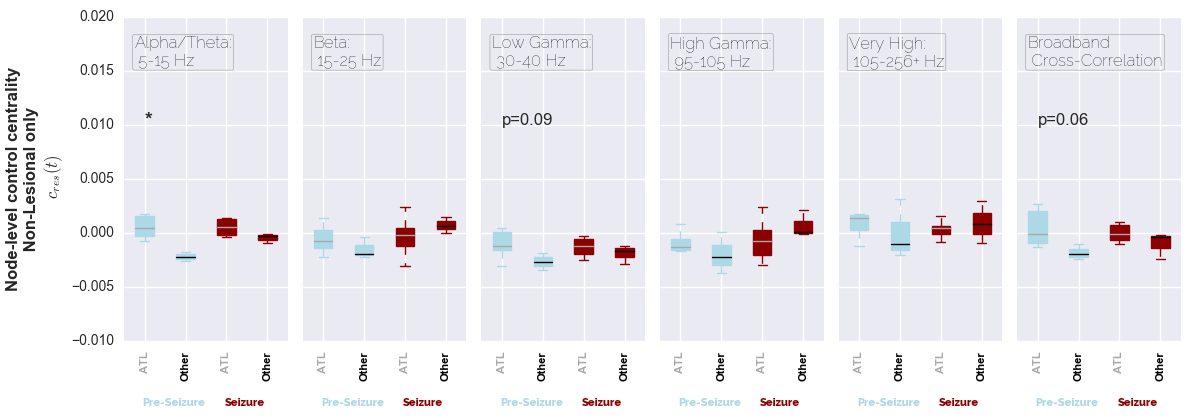

In [13]:
# Figure font options
font1 = {'family':'raleway',
        'color': 'lightblue',
        'weight':'bold',
        'size':8,
        }
font2 = {'family':'raleway',
        'color': 'darkred',
        'weight':'bold',
        'size':8,
        }

max_y = 0.02
# max_y = 3.0
min_y = -0.01
# min_y = -3.0
star_y = 0.010


# Make function to change boxplot colors
def draw_plot(data, edge_color, fill_color):
    bp = ax.boxplot(data, patch_artist=True)
#     print bp['boxes']
    for element in ['boxes','whiskers','fliers','medians','caps']:
        for i in range(len(bp[element])):                
            if element is 'medians':
                plt.setp(bp[element][i], color=fill_color[i][1])
            elif element is 'whiskers' or element is 'caps':
                plt.setp(bp[element][i], color=edge_color[i/2])
            else:
                plt.setp(bp[element][i], color=edge_color[i])
    for i,patch in enumerate(bp['boxes']):
        patch.set(hatch=fill_color[i][0])

fig,axs = plt.subplots(1,6,sharey=True)
# fig.set_figwidth(2.75591)
fig.set_size_inches((12,4))
# fig.suptitle('Resection ',fontdict={'family':'raleway','size':18,'color':'black'})
for ax, fconn in zip(axs,['alphatheta','beta','lowgamma','highgamma','veryhigh','broadband_CC']):
    if(fconn == 'alphatheta'):
        title = 'Alpha/Theta:\n 5-15 Hz'
        ax.set_ylabel('Node-level control centrality\n Non-Lesional only \n $c_{res}(t)$',fontdict={'size':12,'weight':'bold'})
    if(fconn == 'beta'):
        title = 'Beta:\n 15-25 Hz'
    if(fconn == 'lowgamma'):
        title = 'Low Gamma:\n 30-40 Hz'
    if(fconn == 'highgamma'):
        title = 'High Gamma:\n 95-105 Hz'
    if(fconn == 'veryhigh'):
        title = 'Very High:\n 105-256+ Hz'
    if(fconn == 'broadband_CC'):
        title = 'Broadband\n Cross-Correlation'


    draw_plot([atl_pre_res[fconn],other_pre_res[fconn],atl_res[fconn],other_res[fconn]],
              ['lightblue','lightblue','darkred','darkred'],
              [('/','darkgray'),('/','black'),('/','darkgray'),('/','black')])
    s,pre_p = scipy.stats.ranksums(atl_pre_res[fconn], other_pre_res[fconn])
    cd = cohen_d(atl_pre_res[fconn], other_pre_res[fconn])
    print title, 'pre', s,pre_p, cd
    s,post_p = scipy.stats.ranksums(atl_res[fconn], other_res[fconn])
    cd = cohen_d(atl_res[fconn], other_res[fconn])
    print title, 'post',s,post_p, cd

    ax.text(0.95,min_y-(max_y-min_y)*0.2,'Pre-Seizure',fontdict=font1)
    ax.text(2.95,min_y-(max_y-min_y)*0.2,'Seizure',fontdict=font2)
    ax.text(0.75, max_y-(max_y-min_y)*0.15,title, \
            fontdict={'family':'raleway','size':12,'color':'black'}, \
            bbox=dict(facecolor='none',edgecolor='gray',boxstyle='round,pad=0.1'))
    ax.set_ylim([min_y,max_y])
    ax.set_xticks([1,2,3,4])
    ax.set_xticklabels(['ATL','Other','ATL','Other'],fontdict={'size':8,'weight':'bold'},rotation='vertical')
    for ii in range(1,4,2):
        ax.get_xticklabels()[ii].set_color('black')
    for ii in range(0,4,2):
        ax.get_xticklabels()[ii].set_color('darkgray')
    
    if pre_p < 0.001:
        ax.text(1.0,star_y,'***',{'weight':'bold', 'size':14})
    elif pre_p < 0.01:
        ax.text(1.0,star_y,'**',{'weight':'bold', 'size':14})
    elif pre_p < 0.05:
        ax.text(1.0,star_y,'*',{'weight':'bold', 'size':14})
    elif pre_p < 0.1:
        ax.text(1.0,star_y,'p=%0.2f'%pre_p,{'weight':'normal', 'size':12})
    
    if post_p < 0.001:
        ax.text(3.0,star_y,'***',{'weight':'bold', 'size':14})
    elif post_p < 0.01:
        ax.text(3.0,star_y,'**',{'weight':'bold', 'size':14})
    elif post_p < 0.05:
        ax.text(3.0,star_y,'*',{'weight':'bold', 'size':14})
    elif post_p < 0.1:
        ax.text(3.0,star_y,'p=%0.2f'%post_p,{'weight':'normal', 'size':12})
        
plt.tight_layout()
plt.show()
if run_stereotype_only:
    blkah
#     fig.savefig('%s/../fig/FigureS??.png'%(comp_dir))
else:
#     blah
    fig.savefig('%s/../fig/FigureSresection2.png'%(comp_dir))



<h1>Figure S??. Distribution of mean node-level control centrality in ATL patients only</h1>

In [3]:
run_stereotype_only = False
all_nodal_results = gather_nodal_results(fconn='highgamma')
PATIENT_IDX = sorted(all_nodal_results.keys())
comp_dir = os.path.expanduser(data['COMP_DIR'])

# Collect data
# Initialize boxplot arrays
good_pre_res = {}
good_res = {}
poor_pre_res = {}
poor_res = {}

for fconn in ['alphatheta','beta','lowgamma','highgamma','veryhigh','broadband_CC']:
    # All nodal results
    all_nodal_results = gather_nodal_results(fconn=fconn)
    try:
        good_pre_res[fconn]        
    except KeyError:
        good_pre_res[fconn] = []
        good_res[fconn] = []
        poor_pre_res[fconn] = []
        poor_res[fconn] = []
    for patient_id in PATIENT_IDX:
        if patient_id == 'HUP111A':
            continue
        if len(data['PATIENTS'][patient_id]['ELECTRODE_LABELS'].split('/')[-1].split('_')) <= 3:
            continue
        # Get outcome
        outcome = data['PATIENTS'][patient_id]['Outcome']
        outcome = get_outcome(outcome)
        if data['PATIENTS'][patient_id]['Resection Type'] != 'LATL' and data['PATIENTS'][patient_id]['Resection Type'] != 'RATL':
            continue
        pre_res = []
        res = []
        
        # Get resected nodes and non-resected nodes
        first_clip_id = data['PATIENTS'][patient_id]['Events']['Ictal'].keys()[0]
        nodal_control_centrality = all_nodal_results[patient_id][first_clip_id]
        resected_node_idx, non_resected_node_idx, channels = get_resected_node_dx(patient_id)

        if outcome == 'Good':
            # Load event
            for clip_id in data['PATIENTS'][patient_id]['Events']['Ictal'].keys():
                if clip_id == '1000':
                    continue
                if run_stereotype_only:
                    common_stype = scipy.stats.mode(map(lambda x: x['SeizurePhenotype'], data['PATIENTS'][patient_id]['Events']['Ictal'].values()))[0][0]
                    stype = data['PATIENTS'][patient_id]['Events']['Ictal'][clip_id]['SeizurePhenotype']
                    if stype != common_stype:
                        continue
#                 stype = data['PATIENTS'][patient_id]['Events']['Ictal'][clip_id]['SeizurePhenotype']
#                 if stype not in ['A','B','C','D']:
#                     continue
#                 stype = data['PATIENTS'][patient_id]['Events']['Ictal'][clip_id]['SeizureType']
#                 if 'CPS' not in stype or stype == '??':
#                     continue
                event = data['PATIENTS'][patient_id]['Events']['Ictal'][clip_id]
                try:
                    nodal_control_centrality = all_nodal_results[patient_id][clip_id]
                except KeyError:
                    continue

                nodal_control_centrality = nodal_control_centrality[:,:nodal_control_centrality.shape[1]/2]
                mean_nodal_control_centrality = np.nanmedian(nodal_control_centrality, axis=1)
                
                pre_res.append(np.nanmedian(mean_nodal_control_centrality[resected_node_idx]))
    
                try:
                    nodal_control_centrality = all_nodal_results[patient_id][clip_id]
                except KeyError:
                    continue

                nodal_control_centrality = nodal_control_centrality[:,nodal_control_centrality.shape[1]/2:]
                mean_nodal_control_centrality = np.nanmedian(nodal_control_centrality, axis=1)
                
                res.append(np.nanmedian(mean_nodal_control_centrality[resected_node_idx]))


            good_pre_res[fconn].append(np.nanmedian(pre_res))
            good_res[fconn].append(np.nanmedian(res))
        if outcome == 'Poor':
            # Load event
            for clip_id in data['PATIENTS'][patient_id]['Events']['Ictal'].keys():
                if clip_id == '1000':
                    continue
                if run_stereotype_only:
                    common_stype = scipy.stats.mode(map(lambda x: x['SeizurePhenotype'], data['PATIENTS'][patient_id]['Events']['Ictal'].values()))[0][0]
                    stype = data['PATIENTS'][patient_id]['Events']['Ictal'][clip_id]['SeizurePhenotype']
                    if stype != common_stype:
                        continue
#                 print patient_id, clip_id
#                 stype = data['PATIENTS'][patient_id]['Events']['Ictal'][clip_id]['SeizurePhenotype']
#                 if stype not in ['A','B','C','D']:
#                     continue
#                 stype = data['PATIENTS'][patient_id]['Events']['Ictal'][clip_id]['SeizureType']
#                 if 'CPS' not in stype or stype == '??':
#                     continue
                event = data['PATIENTS'][patient_id]['Events']['Ictal'][clip_id]
                try:
                    nodal_control_centrality = all_nodal_results[patient_id][clip_id]
                except KeyError:
                    continue

                nodal_control_centrality = nodal_control_centrality[:,:nodal_control_centrality.shape[1]/2]
                mean_nodal_control_centrality = np.nanmedian(nodal_control_centrality, axis=1)

                pre_res.append(np.nanmedian(mean_nodal_control_centrality[resected_node_idx]))

                try:
                    nodal_control_centrality = all_nodal_results[patient_id][clip_id]
                except KeyError:
                    continue
                
                nodal_control_centrality = nodal_control_centrality[:,nodal_control_centrality.shape[1]/2:]
                mean_nodal_control_centrality = np.nanmedian(nodal_control_centrality, axis=1)
                
                res.append(np.nanmedian(mean_nodal_control_centrality[resected_node_idx]))
                
            poor_pre_res[fconn].append(np.nanmedian(pre_res))
            poor_res[fconn].append(np.nanmedian(res))
            

Alpha/Theta:
 5-15 Hz pre 0.0975900072949 0.922257859652 0.512772867305
Alpha/Theta:
 5-15 Hz post -0.780720058359 0.434967160614 0.243303895856
Beta:
 15-25 Hz pre 0.487950036474 0.625585231524 0.634880928267
Beta:
 15-25 Hz post -0.487950036474 0.625585231524 0.0932425814742
Low Gamma:
 30-40 Hz pre 1.17108008754 0.241566586969 0.673336425166
Low Gamma:
 30-40 Hz post 0.0 1.0 0.223434096659
High Gamma:
 95-105 Hz pre 1.65903012401 0.097109722259 0.630580103736
High Gamma:
 95-105 Hz post -0.0975900072949 0.922257859652 0.537959411362
Very High:
 105-256+ Hz pre 0.292770021885 0.769697943781 -0.113922508947
Very High:
 105-256+ Hz post 0.390360029179 0.696270340114 0.371723198053
Broadband
 Cross-Correlation pre 0.0 1.0 0.446114903443
Broadband
 Cross-Correlation post 0.0975900072949 0.922257859652 0.248197511588


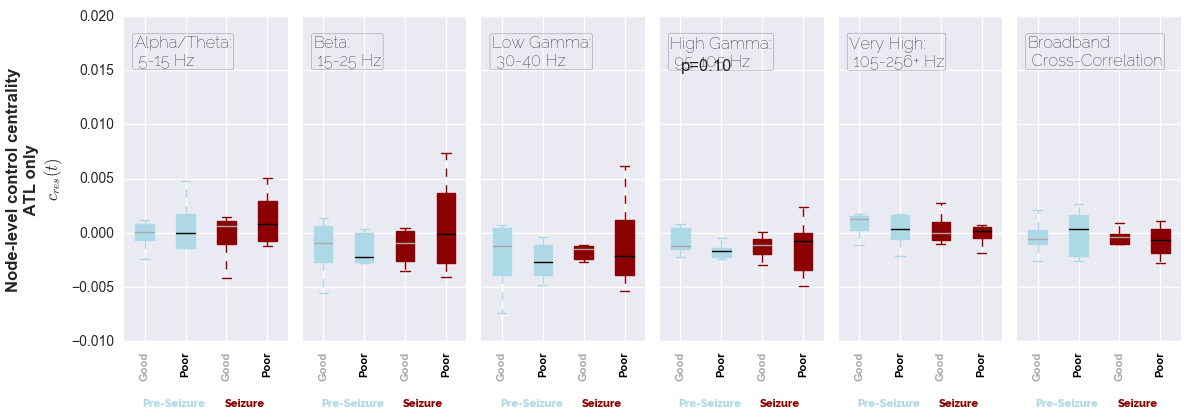

In [4]:
# Figure font options
font1 = {'family':'raleway',
        'color': 'lightblue',
        'weight':'bold',
        'size':8,
        }
font2 = {'family':'raleway',
        'color': 'darkred',
        'weight':'bold',
        'size':8,
        }

max_y = 0.02
# max_y = 3.0
min_y = -0.01
# min_y = -3.0
star_y = 0.015


# Make function to change boxplot colors
def draw_plot(data, edge_color, fill_color):
    bp = ax.boxplot(data, patch_artist=True)
#     print bp['boxes']
    for element in ['boxes','whiskers','fliers','medians','caps']:
        for i in range(len(bp[element])):                
            if element is 'medians':
                plt.setp(bp[element][i], color=fill_color[i][1])
            elif element is 'whiskers' or element is 'caps':
                plt.setp(bp[element][i], color=edge_color[i/2])
            else:
                plt.setp(bp[element][i], color=edge_color[i])
    for i,patch in enumerate(bp['boxes']):
        patch.set(hatch=fill_color[i][0])

fig,axs = plt.subplots(1,6,sharey=True)
# fig.set_figwidth(2.75591)
fig.set_size_inches((12,4))
# fig.suptitle('Resection ',fontdict={'family':'raleway','size':18,'color':'black'})
for ax, fconn in zip(axs,['alphatheta','beta','lowgamma','highgamma','veryhigh','broadband_CC']):
    if(fconn == 'alphatheta'):
        title = 'Alpha/Theta:\n 5-15 Hz'
        ax.set_ylabel('Node-level control centrality\n ATL only \n$c_{res}(t)$',fontdict={'size':12,'weight':'bold'})
    if(fconn == 'beta'):
        title = 'Beta:\n 15-25 Hz'
    if(fconn == 'lowgamma'):
        title = 'Low Gamma:\n 30-40 Hz'
    if(fconn == 'highgamma'):
        title = 'High Gamma:\n 95-105 Hz'
    if(fconn == 'veryhigh'):
        title = 'Very High:\n 105-256+ Hz'
    if(fconn == 'broadband_CC'):
        title = 'Broadband\n Cross-Correlation'

#     ax.boxplot([good_pre_res[fconn],poor_pre_res[fconn],good_res[fconn],poor_res[fconn]])
    draw_plot([good_pre_res[fconn],poor_pre_res[fconn],good_res[fconn],poor_res[fconn]],
              ['lightblue','lightblue','darkred','darkred'],
              [('/','darkgray'),('/','black'),('/','darkgray'),('/','black')])
    s,pre_p = scipy.stats.ranksums(good_pre_res[fconn], poor_pre_res[fconn])
    cd = cohen_d(good_pre_res[fconn], poor_pre_res[fconn])
    print title, 'pre', s,pre_p, cd
    s,post_p = scipy.stats.ranksums(good_res[fconn], poor_res[fconn])
    cd = cohen_d(good_res[fconn], poor_res[fconn])
    print title, 'post',s,post_p, cd

    ax.text(0.95,min_y-(max_y-min_y)*0.2,'Pre-Seizure',fontdict=font1)
    ax.text(2.95,min_y-(max_y-min_y)*0.2,'Seizure',fontdict=font2)
    ax.text(0.75, max_y-(max_y-min_y)*0.15,title, \
            fontdict={'family':'raleway','size':12,'color':'black'}, \
            bbox=dict(facecolor='none',edgecolor='gray',boxstyle='round,pad=0.1'))
    ax.set_ylim([min_y,max_y])
    ax.set_xticks([1,2,3,4])
    ax.set_xticklabels(['Good','Poor','Good','Poor'],fontdict={'size':8,'weight':'bold'},rotation='vertical')
    for ii in range(1,4,2):
        ax.get_xticklabels()[ii].set_color('black')
    for ii in range(0,4,2):
        ax.get_xticklabels()[ii].set_color('darkgray')
    
    if pre_p < 0.001:
        ax.text(1.0,star_y,'***',{'weight':'bold', 'size':14})
    elif pre_p < 0.01:
        ax.text(1.0,star_y,'**',{'weight':'bold', 'size':14})
    elif pre_p < 0.05:
        ax.text(1.0,star_y,'*',{'weight':'bold', 'size':14})
    elif pre_p < 0.1:
        ax.text(1.0,star_y,'p=%0.2f'%pre_p,{'weight':'normal', 'size':12})
    
    if post_p < 0.001:
        ax.text(3.0,star_y,'***',{'weight':'bold', 'size':14})
    elif post_p < 0.01:
        ax.text(3.0,star_y,'**',{'weight':'bold', 'size':14})
    elif post_p < 0.05:
        ax.text(3.0,star_y,'*',{'weight':'bold', 'size':14})
    elif post_p < 0.1:
        ax.text(3.0,star_y,'p=%0.2f'%post_p,{'weight':'normal', 'size':12})
        
plt.tight_layout()
plt.show()
if run_stereotype_only:
    blah
#     fig.savefig('%s/../fig/FigureS??.png'%(comp_dir))
else:
    fig.savefig('%s/../fig/FigureSresection3.png'%(comp_dir))



Low Gamma:
 30-40 Hz pre 1.17108008754 0.241566586969 0.673336425166
Low Gamma:
 30-40 Hz post 0.0 1.0 0.223434096659
Low Gamma:
 30-40 Hz pre 1.17108008754 0.241566586969 0.673336425166
Low Gamma:
 30-40 Hz post 0.0 1.0 0.223434096659
Low Gamma:
 30-40 Hz pre 1.17108008754 0.241566586969 0.673336425166
Low Gamma:
 30-40 Hz post 0.0 1.0 0.223434096659
Low Gamma:
 30-40 Hz pre 1.17108008754 0.241566586969 0.673336425166
Low Gamma:
 30-40 Hz post 0.0 1.0 0.223434096659
Low Gamma:
 30-40 Hz pre 1.17108008754 0.241566586969 0.673336425166
Low Gamma:
 30-40 Hz post 0.0 1.0 0.223434096659
Low Gamma:
 30-40 Hz pre 1.17108008754 0.241566586969 0.673336425166
Low Gamma:
 30-40 Hz post 0.0 1.0 0.223434096659


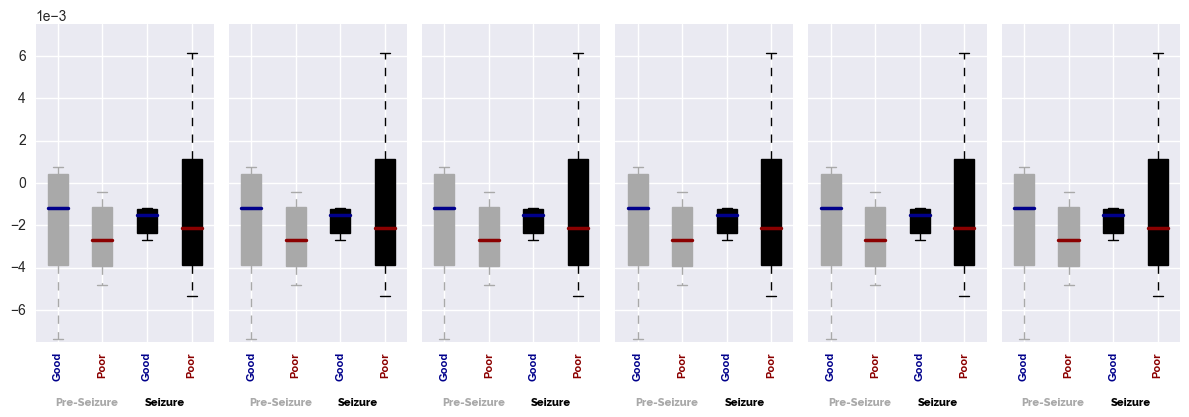

In [6]:
# Figure font options
font1 = {'family':'raleway',
        'color': 'darkgray',
        'weight':'bold',
        'size':8,
        }
font2 = {'family':'raleway',
        'color': 'black',
        'weight':'bold',
        'size':8,
        }

max_y = 0.0075
# max_y = 3.0
min_y = -0.0075
# min_y = -3.0
star_y = 0.005


# Make function to change boxplot colors
def draw_plot(data, edge_color, fill_color):
    medianprops = dict(linestyle='-', linewidth=2.5)
    bp = ax.boxplot(data, patch_artist=True,medianprops=medianprops)
#     print bp['boxes']
    for element in ['boxes','whiskers','fliers','medians','caps']:
        for i in range(len(bp[element])):                
            if element is 'medians':
                plt.setp(bp[element][i], color=fill_color[i][1])
            elif element is 'whiskers' or element is 'caps':
                plt.setp(bp[element][i], color=edge_color[i/2])
            else:
                plt.setp(bp[element][i], color=edge_color[i])
    for i,patch in enumerate(bp['boxes']):
        patch.set(hatch=fill_color[i][0])

fig,axs = plt.subplots(1,6,sharey=True)
# fig.set_figwidth(2.75591)
fig.set_size_inches((12,4))
# fig.suptitle('Resection ',fontdict={'family':'raleway','size':18,'color':'darkred'})
for ax, fconn in zip(axs,['lowgamma','lowgamma','lowgamma','lowgamma','lowgamma','lowgamma']):
    if(fconn == 'alphatheta'):
        title = 'Alpha/Theta:\n 5-15 Hz'
        ax.set_ylabel('Node-level control centrality\n ATL only \n$c_{res}(t)$',fontdict={'size':12,'weight':'bold'})
    if(fconn == 'beta'):
        title = 'Beta:\n 15-25 Hz'
    if(fconn == 'lowgamma'):
        title = 'Low Gamma:\n 30-40 Hz'
    if(fconn == 'highgamma'):
        title = 'High Gamma:\n 95-105 Hz'
    if(fconn == 'veryhigh'):
        title = 'Very High:\n 105-256+ Hz'
    if(fconn == 'broadband_CC'):
        title = 'Broadband\n Cross-Correlation'

#     ax.boxplot([good_pre_res[fconn],poor_pre_res[fconn],good_res[fconn],poor_res[fconn]])
    draw_plot([good_pre_res[fconn],poor_pre_res[fconn],good_res[fconn],poor_res[fconn]],
              ['darkgray','darkgray','black','black'],
              [('/','darkblue'),('/','darkred'),('/','darkblue'),('/','darkred')])
    s,pre_p = scipy.stats.ranksums(good_pre_res[fconn], poor_pre_res[fconn])
    cd = cohen_d(good_pre_res[fconn], poor_pre_res[fconn])
    print title, 'pre', s,pre_p, cd
    s,post_p = scipy.stats.ranksums(good_res[fconn], poor_res[fconn])
    cd = cohen_d(good_res[fconn], poor_res[fconn])
    print title, 'post',s,post_p, cd

    ax.text(0.95,min_y-(max_y-min_y)*0.2,'Pre-Seizure',fontdict=font1)
    ax.text(2.95,min_y-(max_y-min_y)*0.2,'Seizure',fontdict=font2)
#     ax.text(0.75, max_y-(max_y-min_y)*0.15,title, \
#             fontdict={'family':'raleway','size':12,'color':'darkred'}, \
#             bbox=dict(facecolor='none',edgecolor='gray',boxstyle='round,pad=0.1'))
    ax.set_ylim([min_y,max_y])
    ax.set_xticks([1,2,3,4])
    ax.set_xticklabels(['Good','Poor','Good','Poor'],fontdict={'size':8,'weight':'bold'},rotation='vertical')
    for ii in range(1,4,2):
        ax.get_xticklabels()[ii].set_color('darkred')
    for ii in range(0,4,2):
        ax.get_xticklabels()[ii].set_color('darkblue')
    
    if pre_p < 0.001:
        ax.text(1.0,star_y,'***',{'weight':'bold', 'size':14})
    elif pre_p < 0.01:
        ax.text(1.0,star_y,'**',{'weight':'bold', 'size':14})
    elif pre_p < 0.05:
        ax.text(1.0,star_y,'*',{'weight':'bold', 'size':14})
    elif pre_p < 0.1:
        ax.text(1.0,star_y,'p=%0.2f'%pre_p,{'weight':'normal', 'size':12})
    
    if post_p < 0.001:
        ax.text(3.0,star_y,'***',{'weight':'bold', 'size':14})
    elif post_p < 0.01:
        ax.text(3.0,star_y,'**',{'weight':'bold', 'size':14})
    elif post_p < 0.05:
        ax.text(3.0,star_y,'*',{'weight':'bold', 'size':14})
    elif post_p < 0.1:
        ax.text(3.0,star_y,'p=%0.2f'%post_p,{'weight':'normal', 'size':12})
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,3),useMathText=True,useOffset=False)        
plt.tight_layout()
plt.show()
# if run_stereotype_only:
#     blah
# #     fig.savefig('%s/../fig/FigureS??.png'%(comp_dir))
# else:
#     fig.savefig('%s/../fig/FigureSresection3.png'%(comp_dir))



<h1>Figure S??. Distribution of mean node-level control centrality in focal resection patients only</h1>

In [7]:
run_stereotype_only = False
all_nodal_results = gather_nodal_results(fconn='highgamma')
PATIENT_IDX = sorted(all_nodal_results.keys())
comp_dir = os.path.expanduser(data['COMP_DIR'])

# Collect data
# Initialize boxplot arrays
good_pre_res = {}
good_res = {}
poor_pre_res = {}
poor_res = {}

for fconn in ['alphatheta','beta','lowgamma','highgamma','veryhigh','broadband_CC']:
    # All nodal results
    all_nodal_results = gather_nodal_results(fconn=fconn)
    try:
        good_pre_res[fconn]        
    except KeyError:
        good_pre_res[fconn] = []
        good_res[fconn] = []
        poor_pre_res[fconn] = []
        poor_res[fconn] = []
    for patient_id in PATIENT_IDX:
        if patient_id == 'HUP111A':
            continue
        if len(data['PATIENTS'][patient_id]['ELECTRODE_LABELS'].split('/')[-1].split('_')) <= 3:
            continue
        # Get outcome
        outcome = data['PATIENTS'][patient_id]['Outcome']
        outcome = get_outcome(outcome)
        if data['PATIENTS'][patient_id]['Resection Type'] != 'Other':
            continue
        pre_res = []
        res = []
        
        # Get resected nodes and non-resected nodes
        first_clip_id = data['PATIENTS'][patient_id]['Events']['Ictal'].keys()[0]
        nodal_control_centrality = all_nodal_results[patient_id][first_clip_id]
        resected_node_idx, non_resected_node_idx, channels = get_resected_node_dx(patient_id)

        if outcome == 'Good':
            # Load event
            for clip_id in data['PATIENTS'][patient_id]['Events']['Ictal'].keys():
                if clip_id == '1000':
                    continue
                if run_stereotype_only:
                    common_stype = scipy.stats.mode(map(lambda x: x['SeizurePhenotype'], data['PATIENTS'][patient_id]['Events']['Ictal'].values()))[0][0]
                    stype = data['PATIENTS'][patient_id]['Events']['Ictal'][clip_id]['SeizurePhenotype']
                    if stype != common_stype:
                        continue
#                 stype = data['PATIENTS'][patient_id]['Events']['Ictal'][clip_id]['SeizurePhenotype']
#                 if stype not in ['A','B','C','D']:
#                     continue
#                 stype = data['PATIENTS'][patient_id]['Events']['Ictal'][clip_id]['SeizureType']
#                 if 'CPS' not in stype or stype == '??':
#                     continue
                event = data['PATIENTS'][patient_id]['Events']['Ictal'][clip_id]
                try:
                    nodal_control_centrality = all_nodal_results[patient_id][clip_id]
                except KeyError:
                    continue

                nodal_control_centrality = nodal_control_centrality[:,:nodal_control_centrality.shape[1]/2]
                mean_nodal_control_centrality = np.nanmedian(nodal_control_centrality, axis=1)
                
                pre_res.append(np.nanmedian(mean_nodal_control_centrality[resected_node_idx]))
    
                try:
                    nodal_control_centrality = all_nodal_results[patient_id][clip_id]
                except KeyError:
                    continue

                nodal_control_centrality = nodal_control_centrality[:,nodal_control_centrality.shape[1]/2:]
                mean_nodal_control_centrality = np.nanmedian(nodal_control_centrality, axis=1)
                
                res.append(np.nanmedian(mean_nodal_control_centrality[resected_node_idx]))


            good_pre_res[fconn].append(np.nanmedian(pre_res))
            good_res[fconn].append(np.nanmedian(res))
        if outcome == 'Poor':
            # Load event
            for clip_id in data['PATIENTS'][patient_id]['Events']['Ictal'].keys():
                if clip_id == '1000':
                    continue
                if run_stereotype_only:
                    common_stype = scipy.stats.mode(map(lambda x: x['SeizurePhenotype'], data['PATIENTS'][patient_id]['Events']['Ictal'].values()))[0][0]
                    stype = data['PATIENTS'][patient_id]['Events']['Ictal'][clip_id]['SeizurePhenotype']
                    if stype != common_stype:
                        continue
#                 print patient_id, clip_id
#                 stype = data['PATIENTS'][patient_id]['Events']['Ictal'][clip_id]['SeizurePhenotype']
#                 if stype not in ['A','B','C','D']:
#                     continue
#                 stype = data['PATIENTS'][patient_id]['Events']['Ictal'][clip_id]['SeizureType']
#                 if 'CPS' not in stype or stype == '??':
#                     continue
                event = data['PATIENTS'][patient_id]['Events']['Ictal'][clip_id]
                try:
                    nodal_control_centrality = all_nodal_results[patient_id][clip_id]
                except KeyError:
                    continue

                nodal_control_centrality = nodal_control_centrality[:,:nodal_control_centrality.shape[1]/2]
                mean_nodal_control_centrality = np.nanmedian(nodal_control_centrality, axis=1)

                pre_res.append(np.nanmedian(mean_nodal_control_centrality[resected_node_idx]))

                try:
                    nodal_control_centrality = all_nodal_results[patient_id][clip_id]
                except KeyError:
                    continue
                
                nodal_control_centrality = nodal_control_centrality[:,nodal_control_centrality.shape[1]/2:]
                mean_nodal_control_centrality = np.nanmedian(nodal_control_centrality, axis=1)
                
                res.append(np.nanmedian(mean_nodal_control_centrality[resected_node_idx]))
                
            poor_pre_res[fconn].append(np.nanmedian(pre_res))
            poor_res[fconn].append(np.nanmedian(res))
            

Alpha/Theta:
 5-15 Hz pre 0.0 1.0 0.0258278130212
Alpha/Theta:
 5-15 Hz post 0.0 1.0 0.104431123412
Beta:
 15-25 Hz pre -0.734846922835 0.46243272645 0.0764698396699
Beta:
 15-25 Hz post 0.979795897113 0.32718687779 0.411767334468
Low Gamma:
 30-40 Hz pre 0.0 1.0 0.0830709882606
Low Gamma:
 30-40 Hz post 0.0 1.0 0.498264474371
High Gamma:
 95-105 Hz pre -1.46969384567 0.141644690295 -1.13639382016
High Gamma:
 95-105 Hz post 0.0 1.0 -0.102359541981
Very High:
 105-256+ Hz pre -2.44948974278 0.0143058784354 -5.3602803816
Very High:
 105-256+ Hz post -1.22474487139 0.22067136192 -0.764309599196
Broadband
 Cross-Correlation pre -0.979795897113 0.32718687779 -0.287845283539
Broadband
 Cross-Correlation post -0.489897948557 0.624206114766 0.174973192564


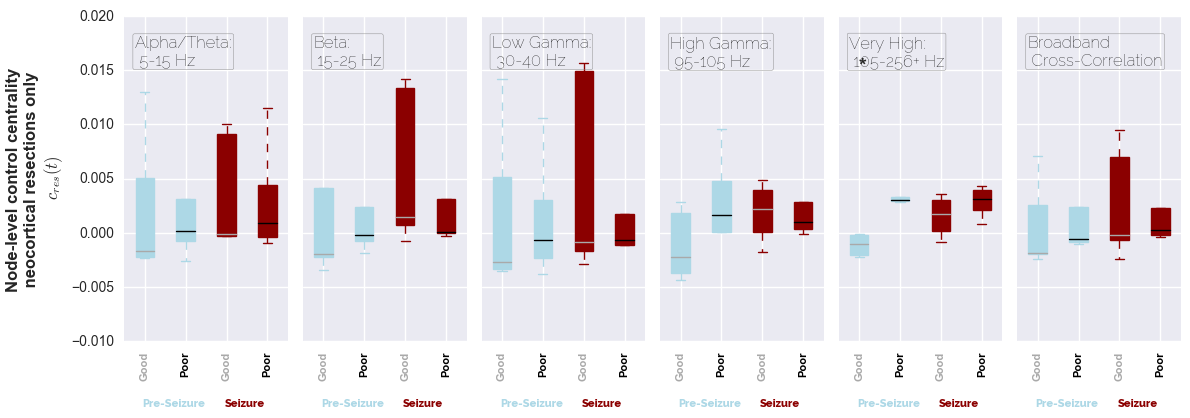

In [8]:
# Figure font options
font1 = {'family':'raleway',
        'color': 'lightblue',
        'weight':'bold',
        'size':8,
        }
font2 = {'family':'raleway',
        'color': 'darkred',
        'weight':'bold',
        'size':8,
        }

max_y = 0.02
# max_y = 3.0
min_y = -0.01
# min_y = -3.0
star_y = 0.015


# Make function to change boxplot colors
def draw_plot(data, edge_color, fill_color):
    bp = ax.boxplot(data, patch_artist=True)
#     print bp['boxes']
    for element in ['boxes','whiskers','fliers','medians','caps']:
        for i in range(len(bp[element])):                
            if element is 'medians':
                plt.setp(bp[element][i], color=fill_color[i][1])
            elif element is 'whiskers' or element is 'caps':
                plt.setp(bp[element][i], color=edge_color[i/2])
            else:
                plt.setp(bp[element][i], color=edge_color[i])
    for i,patch in enumerate(bp['boxes']):
        patch.set(hatch=fill_color[i][0])

fig,axs = plt.subplots(1,6,sharey=True)
# fig.set_figwidth(2.75591)
fig.set_size_inches((12,4))
# fig.suptitle('Resection ',fontdict={'family':'raleway','size':18,'color':'black'})
for ax, fconn in zip(axs,['alphatheta','beta','lowgamma','highgamma','veryhigh','broadband_CC']):
    if(fconn == 'alphatheta'):
        title = 'Alpha/Theta:\n 5-15 Hz'
        ax.set_ylabel('Node-level control centrality\n neocortical resections only \n $c_{res}(t)$',fontdict={'size':12,'weight':'bold'})
    if(fconn == 'beta'):
        title = 'Beta:\n 15-25 Hz'
    if(fconn == 'lowgamma'):
        title = 'Low Gamma:\n 30-40 Hz'
    if(fconn == 'highgamma'):
        title = 'High Gamma:\n 95-105 Hz'
    if(fconn == 'veryhigh'):
        title = 'Very High:\n 105-256+ Hz'
    if(fconn == 'broadband_CC'):
        title = 'Broadband\n Cross-Correlation'

#     ax.boxplot([good_pre_res[fconn],poor_pre_res[fconn],good_res[fconn],poor_res[fconn]])
    draw_plot([good_pre_res[fconn],poor_pre_res[fconn],good_res[fconn],poor_res[fconn]],
              ['lightblue','lightblue','darkred','darkred'],
              [('/','darkgray'),('/','black'),('/','darkgray'),('/','black')])
    s,pre_p = scipy.stats.ranksums(good_pre_res[fconn], poor_pre_res[fconn])
    cd = cohen_d(good_pre_res[fconn], poor_pre_res[fconn])
    print title, 'pre', s,pre_p, cd
    s,post_p = scipy.stats.ranksums(good_res[fconn], poor_res[fconn])
    cd = cohen_d(good_res[fconn], poor_res[fconn])
    print title, 'post',s,post_p, cd

    ax.text(0.95,min_y-(max_y-min_y)*0.2,'Pre-Seizure',fontdict=font1)
    ax.text(2.95,min_y-(max_y-min_y)*0.2,'Seizure',fontdict=font2)
    ax.text(0.75, max_y-(max_y-min_y)*0.15,title, \
            fontdict={'family':'raleway','size':12,'color':'black'}, \
            bbox=dict(facecolor='none',edgecolor='gray',boxstyle='round,pad=0.1'))
    ax.set_ylim([min_y,max_y])
    ax.set_xticks([1,2,3,4])
    ax.set_xticklabels(['Good','Poor','Good','Poor'],fontdict={'size':8,'weight':'bold'},rotation='vertical')
    for ii in range(1,4,2):
        ax.get_xticklabels()[ii].set_color('black')
    for ii in range(0,4,2):
        ax.get_xticklabels()[ii].set_color('darkgray')
    
    if pre_p < 0.001:
        ax.text(1.0,star_y,'***',{'weight':'bold', 'size':14})
    elif pre_p < 0.01:
        ax.text(1.0,star_y,'**',{'weight':'bold', 'size':14})
    elif pre_p < 0.05:
        ax.text(1.0,star_y,'*',{'weight':'bold', 'size':14})
    elif pre_p < 0.1:
        ax.text(1.0,star_y,'p=%0.2f'%pre_p,{'weight':'normal', 'size':12})
    
    if post_p < 0.001:
        ax.text(3.0,star_y,'***',{'weight':'bold', 'size':14})
    elif post_p < 0.01:
        ax.text(3.0,star_y,'**',{'weight':'bold', 'size':14})
    elif post_p < 0.05:
        ax.text(3.0,star_y,'*',{'weight':'bold', 'size':14})
    elif post_p < 0.1:
        ax.text(3.0,star_y,'p=%0.2f'%post_p,{'weight':'normal', 'size':12})
        
plt.tight_layout()
plt.show()
if run_stereotype_only:
    blah
#     fig.savefig('%s/../fig/FigureS??.png'%(comp_dir))
else:
    fig.savefig('%s/../fig/FigureSresection4.png'%(comp_dir))



Very High:
 105-256+ Hz pre -2.44948974278 0.0143058784354 -5.3602803816
Very High:
 105-256+ Hz post -1.22474487139 0.22067136192 -0.764309599196
Very High:
 105-256+ Hz pre -2.44948974278 0.0143058784354 -5.3602803816
Very High:
 105-256+ Hz post -1.22474487139 0.22067136192 -0.764309599196
High Gamma:
 95-105 Hz pre -1.46969384567 0.141644690295 -1.13639382016
High Gamma:
 95-105 Hz post 0.0 1.0 -0.102359541981
High Gamma:
 95-105 Hz pre -1.46969384567 0.141644690295 -1.13639382016
High Gamma:
 95-105 Hz post 0.0 1.0 -0.102359541981
High Gamma:
 95-105 Hz pre -1.46969384567 0.141644690295 -1.13639382016
High Gamma:
 95-105 Hz post 0.0 1.0 -0.102359541981
High Gamma:
 95-105 Hz pre -1.46969384567 0.141644690295 -1.13639382016
High Gamma:
 95-105 Hz post 0.0 1.0 -0.102359541981


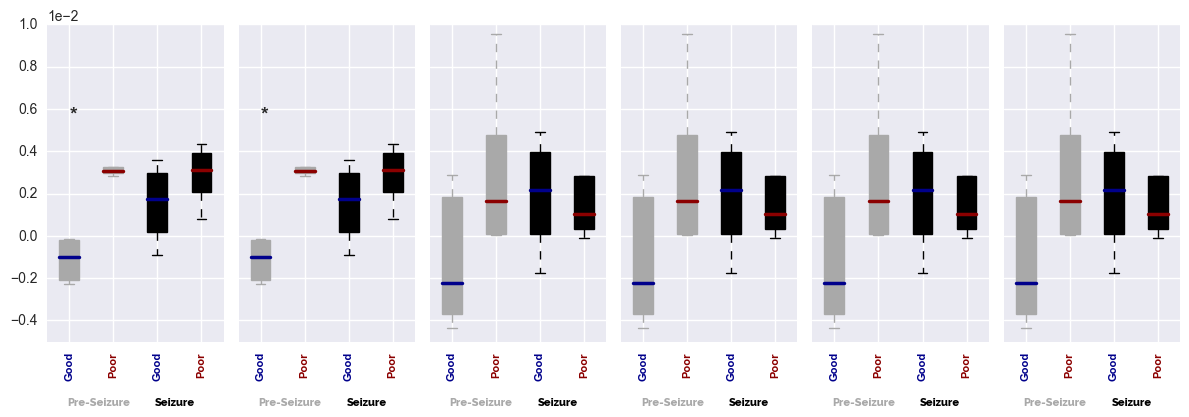

In [11]:
# Figure font options
font1 = {'family':'raleway',
        'color': 'darkgray',
        'weight':'bold',
        'size':8,
        }
font2 = {'family':'raleway',
        'color': 'black',
        'weight':'bold',
        'size':8,
        }

max_y = 0.01
# max_y = 3.0
min_y = -0.005
# min_y = -3.0
star_y = 0.0055


# Make function to change boxplot colors
def draw_plot(data, edge_color, fill_color):
    medianprops = dict(linestyle='-', linewidth=2.5)
    bp = ax.boxplot(data, patch_artist=True,medianprops=medianprops)
#     print bp['boxes']
    for element in ['boxes','whiskers','fliers','medians','caps']:
        for i in range(len(bp[element])):                
            if element is 'medians':
                plt.setp(bp[element][i], color=fill_color[i][1])
            elif element is 'whiskers' or element is 'caps':
                plt.setp(bp[element][i], color=edge_color[i/2])
            else:
                plt.setp(bp[element][i], color=edge_color[i])
    for i,patch in enumerate(bp['boxes']):
        patch.set(hatch=fill_color[i][0])

fig,axs = plt.subplots(1,6,sharey=True)
# fig.set_figwidth(2.75591)
fig.set_size_inches((12,4))
# fig.suptitle('Resection ',fontdict={'family':'raleway','size':18,'color':'darkred'})
for ax, fconn in zip(axs,['veryhigh','veryhigh','highgamma','highgamma','highgamma','highgamma']):
    if(fconn == 'alphatheta'):
        title = 'Alpha/Theta:\n 5-15 Hz'
        ax.set_ylabel('Node-level control centrality\n neocortical resections only \n $c_{res}(t)$',fontdict={'size':12,'weight':'bold'})
    if(fconn == 'beta'):
        title = 'Beta:\n 15-25 Hz'
    if(fconn == 'lowgamma'):
        title = 'Low Gamma:\n 30-40 Hz'
    if(fconn == 'highgamma'):
        title = 'High Gamma:\n 95-105 Hz'
    if(fconn == 'veryhigh'):
        title = 'Very High:\n 105-256+ Hz'
    if(fconn == 'broadband_CC'):
        title = 'Broadband\n Cross-Correlation'

#     ax.boxplot([good_pre_res[fconn],poor_pre_res[fconn],good_res[fconn],poor_res[fconn]])
    draw_plot([good_pre_res[fconn],poor_pre_res[fconn],good_res[fconn],poor_res[fconn]],
              ['darkgray','darkgray','black','black'],
              [('/','darkblue'),('/','darkred'),('/','darkblue'),('/','darkred')])
    s,pre_p = scipy.stats.ranksums(good_pre_res[fconn], poor_pre_res[fconn])
    cd = cohen_d(good_pre_res[fconn], poor_pre_res[fconn])
    print title, 'pre', s,pre_p, cd
    s,post_p = scipy.stats.ranksums(good_res[fconn], poor_res[fconn])
    cd = cohen_d(good_res[fconn], poor_res[fconn])
    print title, 'post',s,post_p, cd

    ax.text(0.95,min_y-(max_y-min_y)*0.2,'Pre-Seizure',fontdict=font1)
    ax.text(2.95,min_y-(max_y-min_y)*0.2,'Seizure',fontdict=font2)
#     ax.text(0.75, max_y-(max_y-min_y)*0.15,title, \
#             fontdict={'family':'raleway','size':12,'color':'black'}, \
#             bbox=dict(facecolor='none',edgecolor='gray',boxstyle='round,pad=0.1'))
    ax.set_ylim([min_y,max_y])
    ax.set_xticks([1,2,3,4])
    ax.set_xticklabels(['Good','Poor','Good','Poor'],fontdict={'size':8,'weight':'bold'},rotation='vertical')
    for ii in range(1,4,2):
        ax.get_xticklabels()[ii].set_color('darkred')
    for ii in range(0,4,2):
        ax.get_xticklabels()[ii].set_color('darkblue')
    
    if pre_p < 0.001:
        ax.text(1.0,star_y,'***',{'weight':'bold', 'size':14})
    elif pre_p < 0.01:
        ax.text(1.0,star_y,'**',{'weight':'bold', 'size':14})
    elif pre_p < 0.05:
        ax.text(1.0,star_y,'*',{'weight':'bold', 'size':14})
    elif pre_p < 0.1:
        ax.text(1.0,star_y,'p=%0.2f'%pre_p,{'weight':'normal', 'size':12})
    
    if post_p < 0.001:
        ax.text(3.0,star_y,'***',{'weight':'bold', 'size':14})
    elif post_p < 0.01:
        ax.text(3.0,star_y,'**',{'weight':'bold', 'size':14})
    elif post_p < 0.05:
        ax.text(3.0,star_y,'*',{'weight':'bold', 'size':14})
    elif post_p < 0.1:
        ax.text(3.0,star_y,'p=%0.2f'%post_p,{'weight':'normal', 'size':12})
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,3),useMathText=True,useOffset=False)        
plt.tight_layout()
plt.show()
# if run_stereotype_only:
#     blah
# #     fig.savefig('%s/../fig/FigureS??.png'%(comp_dir))
# else:
#     fig.savefig('%s/../fig/FigureSresection4.png'%(comp_dir))



<h1> Validation Cohort - Compute average time-varying plots </h1>

In [2]:
run_stereotype_only = False
width = 10
all_freq_nodal_results = {}
for fconn in ['alphatheta','beta','lowgamma','highgamma','veryhigh','broadband_CC']:
    # All cres
    results = {}
    if width == -1:
        raise 'NOT IMPLEMENTED FOR WIDTH -1'

    for patient_id in ['Study004','Study021','Study023','Study026','Study033','Study038']:
        comp_dir = os.path.join(os.path.expanduser(data['COMP_DIR']),patient_id,'aim3')

        # Open all adj
        try:
            for fn in os.listdir(comp_dir):
                if('noderes' in fn and 'csv' not in fn):
                    if(patient_id not in results.keys()):
                        results[patient_id] = {}
                    # print fn
                    clip_id = fn.split('.')[2]
                    if clip_id == '1000':
                        continue
                    seizure_type = data['PATIENTS'][patient_id]['Events']['Ictal'][clip_id]['SeizureType']
                    # if('CPS' not in seizure_type):
                    #     continue
                    results[patient_id][fn.split('.')[2]] = np.load('%s/%s'%(comp_dir,fn))['control_centrality_%s'%fconn]
        except:
            continue
    norm_results = {}
    for patient_id in ['Study004','Study021','Study023','Study026','Study033','Study038']:
        try:
            resected_node_idx, non_resected_node_idx, channels = get_resected_node_dx(patient_id)
        except KeyError:
            continue
        norm_results[patient_id] = {}
        for clip_id in data['PATIENTS'][patient_id]['Events']['Ictal'].keys():
            if clip_id == '1000':
                continue
            try:
                nodal_control_centrality = results[patient_id][clip_id]
            except KeyError:
                continue

            nodal_control_centrality = np.nanmean(nodal_control_centrality[resected_node_idx,:],axis=0).flatten()
            xp = np.linspace(-1.0,1.0,nodal_control_centrality.shape[0])
            norm_results[patient_id][clip_id] = np.interp(np.linspace(-1.0,1.0,width),xp,nodal_control_centrality)
    all_freq_nodal_results[fconn] = norm_results

In [3]:
all_freq_nodal_results

{'alphatheta': {'Study004': {u'1': array([ -4.38027212e-03,   6.47463964e-03,  -5.58155613e-05,
            6.68480362e-03,  -3.83702975e-04,   6.75458621e-03,
           -2.57390449e-03,  -1.04595365e-03,   2.04902478e-04,
           -1.64226311e-03]),
   u'2': array([ 0.00475481, -0.00115488,  0.00700865, -0.00016533,  0.0040373 ,
           0.00773759,  0.00233183,  0.00479618, -0.00092915, -0.00073311]),
   u'3': array([-0.00500017, -0.00131812, -0.001674  ,  0.00032448,  0.00068804,
           0.00853497,  0.01040705,  0.00588579,  0.00247016, -0.00467496])},
  'Study021': {u'1': array([ 0.00057839, -0.00051499, -0.00069943, -0.0017873 , -0.00276199,
          -0.00128359, -0.00196711,  0.01138108,  0.01070422,  0.00274636]),
   u'2': array([-0.00081677, -0.00122341,  0.00347322, -0.00029078,  0.00178127,
          -0.00155081,  0.00126547,  0.00093036, -0.00279206, -0.00046483]),
   u'5': array([ 0.00259915,  0.00550767, -0.00200807,  0.00163924,  0.00236309,
          -0.0026098

0.2021 0.403 0.75
0.7957 0.2004 0.0
0.4157 0.0 0.5
0.7987 0.2029 1.0
0.4096 0.248 0.25
0.0 0.1979 0.25


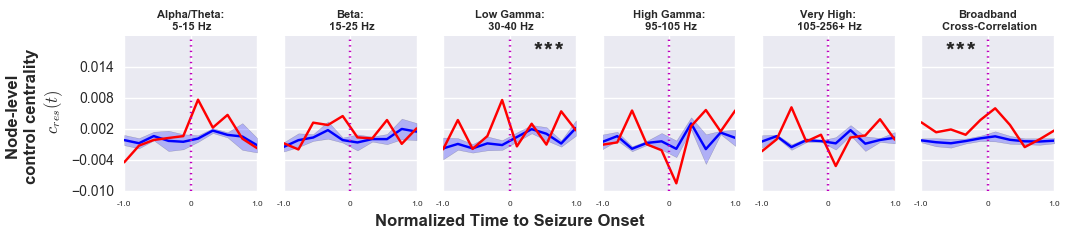

NameError: name 'blah' is not defined

In [8]:
width = 10

# Figure font options
font1 = {'family':'raleway',
        'color': 'lightblue',
        'weight':'bold',
        'size':8,
        }
font2 = {'family':'raleway',
        'color': 'darkred',
        'weight':'bold',
        'size':8,
        }

max_y = 0.02
# max_y = 3.0
min_y = -0.01
# min_y = -3.0
star_y = 0.015

fig,axs = plt.subplots(1,6,sharey=True, sharex=True)
fig.set_size_inches((12,2))

for ax, fconn in zip(axs,['alphatheta','beta','lowgamma','highgamma','veryhigh','broadband_CC']):

    if(fconn == 'alphatheta'):
        title = 'Alpha/Theta: 5-15 Hz'
    if(fconn == 'beta'):
        title = 'Beta: 15-25 Hz'
    if(fconn == 'lowgamma'):
        title = 'Low Gamma: 30-40 Hz'
    if(fconn == 'highgamma'):
        title = 'High Gamma: 95-105 Hz'
    if(fconn == 'veryhigh'):
        title = 'Very High: 105-256+ Hz'
    if(fconn == 'broadband_CC'):
        title = 'Broadband Cross-Correlation'

    skip_chop = True
    skip_mayo = False
    skip_hup = False
    dilate_radius = 0
#     all_nodal_results = gather_resection_norm_nodal_results(fconn=fconn,width=width)
    all_nodal_results = all_freq_nodal_results[fconn]
    num_fts = width

    pt_iter = 0
    patient_idx = all_nodal_results.keys()
    ft_matrix = []

    out_txt = 'pt_id,' #First column
    index_col = []    

    for patient_id in ['Study004','Study021','Study023','Study026','Study033','Study038']:
        if(skip_chop and 'CHOP' in patient_id):
            continue
        if(skip_mayo and 'Study' in patient_id):
            continue
        if(skip_hup and 'HUP' in patient_id):
            continue

        index_col.append(patient_id)
        row_data = np.array((pt_iter+1,))    
        if patient_id == 'Study033':
            continue
        for pid,clips in sorted(all_nodal_results.items(), key=lambda x:x[0]):                    
            if(pid != patient_id):
                continue
            outcome = data['PATIENTS'][patient_id]['Outcome']

            avg_data = np.array(())                    
            for clip, clip_data in sorted(clips.items(), key=lambda x:x[0]):
                if run_stereotype_only:
                    common_stype = scipy.stats.mode(map(lambda x: x['SeizurePhenotype'], data['PATIENTS'][patient_id]['Events']['Ictal'].values()))[0][0]
                    stype = data['PATIENTS'][patient_id]['Events']['Ictal'][clip]['SeizurePhenotype']
                    if stype != common_stype:
                        continue
                res = clip_data                        
                if(res.shape[0] == num_fts+1):
                    res = res[:num_fts]
                try:                
                    avg_data = np.hstack((avg_data,np.reshape(res,(num_fts,1))))
                except Exception:                
                    avg_data = np.reshape(res,(num_fts,1))                    
            avg_data = np.nanmedian(avg_data,axis=1)

            # Update row_data
            row_data = np.hstack((row_data,avg_data)) 

            # Update header
            if(pt_iter == 0):
                for t in range(1,num_fts+1):
                    out_txt += 'base_sync_'+str(t)+'_%s,'%fconn
        if(get_outcome(outcome) == 'Good'):        
            row_data = np.hstack((row_data,[0]))        
        else:
            row_data = np.hstack((row_data,[1]))
        if(row_data.shape[0] != num_fts+2):
            continue
        ft_matrix.append(row_data)
        pt_iter += 1
    ft_matrix = np.array(ft_matrix)
    all_data = ft_matrix[:,1:width+1]
    outcomex = ft_matrix[:,width+1]
    good_outcome_data = all_data[outcomex==0,:]
    poor_outcome_data = all_data[outcomex==1,:]

    good_outcome_data_err = scipy.stats.sem(good_outcome_data,axis=0,nan_policy='omit')

    poor_outcome_data_err = scipy.stats.sem(poor_outcome_data,axis=0,nan_policy='omit')

    font = {'family' : 'Raleway',
        'weight' : 'normal',
        'size'   : 32}
    matplotlib.rc('font', **font)
    matplotlib.rcParams['axes.titlesize'] = 36
    matplotlib.rcParams['axes.titleweight'] = 'bold'
    matplotlib.rcParams['axes.labelsize'] = 32
    matplotlib.rcParams['axes.labelweight'] = 'bold'
    matplotlib.rcParams['ytick.labelsize'] = 16
    matplotlib.rcParams['xtick.labelsize'] = 16
    matplotlib.rcParams['axes.labelcolor'] = 'black'

    
    if(fconn == 'alphatheta'):
        title = 'Alpha/Theta:\n 5-15 Hz'
        ax.set_ylabel('Node-level \ncontrol centrality \n $c_{res}(t)$',fontdict={'size':12,'weight':'bold'})
    if(fconn == 'beta'):
        title = 'Beta:\n 15-25 Hz'
    if(fconn == 'lowgamma'):
        title = 'Low Gamma:\n 30-40 Hz'
        ax.set_xlabel('Normalized Time to Seizure Onset',fontdict={'size':12,'weight':'bold'})
    if(fconn == 'highgamma'):
        title = 'High Gamma:\n 95-105 Hz'
    if(fconn == 'veryhigh'):
        title = 'Very High:\n 105-256+ Hz'
    if(fconn == 'broadband_CC'):
        title = 'Broadband\n Cross-Correlation'
    
    ax.plot(np.linspace(-1.0,1.0,num_fts),np.nanmean(good_outcome_data,axis=0),'b')
    ax.hold(True)
    ax.fill_between(np.linspace(-1.0,1.0,num_fts),np.nanmean(good_outcome_data,axis=0)-good_outcome_data_err,np.nanmean(good_outcome_data,axis=0)+good_outcome_data_err,facecolor='blue',alpha=0.25)
    ax.plot(np.linspace(-1.0,1.0,num_fts),np.nanmean(poor_outcome_data,axis=0), 'r')
    ax.fill_between(np.linspace(-1.0,1.0,num_fts),np.nanmean(poor_outcome_data,axis=0)-poor_outcome_data_err,np.nanmean(poor_outcome_data,axis=0)+poor_outcome_data_err,facecolor='red',alpha=0.25)
    ax.set_xlim(( -1.0, 1.0))    
    ax.set_ylim((min_y, max_y))
    ax.plot([0,0],[min_y,max_y],color='m',linestyle=':')
    ax.set_yticks(np.arange(min_y,max_y,(max_y-min_y)/5.0))
    
    ax.set_xticks([-1.0,0,1.0])
    ax.set_xticklabels([-1.0,0,1.0],fontdict={'size':6,'weight':'normal'})

    ax.set_title(title,fontdict={'size':8,'weight':'bold'})    
    
    ax.grid(True)
    
    # Make significance indicators

    fpr,tpr,threshold = roc_curve(outcomex,np.nanmedian(all_data[:,width/2:],axis=1)-np.nanmedian(all_data[:,:width/2],axis=1))    
    roc_auc = auc(fpr,tpr)
    pre_p = curve_test(all_data[:,:all_data.shape[0]/2].T,np.where(outcomex==0)[0],np.where(outcomex==1)[0],10000)
    post_p = curve_test(all_data[:,all_data.shape[0]/2:].T,np.where(outcomex==0)[0],np.where(outcomex==1)[0],10000)
    if pre_p < 0.001:
        ax.text(-0.65,star_y, '***',{'weight':'bold', 'size':22})
    elif pre_p < 0.01:
        ax.text(-0.65,star_y, '**',{'weight':'bold', 'size':22})
    elif pre_p < 0.05:
        ax.text(-0.65,star_y, '*',{'weight':'bold', 'size':22})
    elif pre_p < 0.1:
        ax.text(-0.65,star_y, 'p=%0.2f'%pre_p,{'weight':'normal', 'size':22})
    
    if post_p < 0.001:
        ax.text(0.35,star_y, '***',{'weight':'bold', 'size':22})
    elif post_p < 0.01:
        ax.text(0.35,star_y, '**',{'weight':'bold', 'size':22})
    elif post_p < 0.05:
        ax.text(0.35,star_y, '*',{'weight':'bold', 'size':22})
    elif post_p < 0.1:
        ax.text(0.35,star_y, 'p=%0.2f'%post_p,{'weight':'normal', 'size':22})

    print pre_p, post_p, roc_auc

plt.show()
if run_stereotype_only:
    blah
    plt.savefig('../../fig/FigureS??_validation1.png',bbox_inches='tight', format='png', dpi=1200)
else:
    blah
    plt.savefig('../../fig/FigureS??_validation1.png',bbox_inches='tight', format='png', dpi=1200)


In [6]:
all_data

NameError: name 'all_data' is not defined

<h1>Validation cohort accuracy </h1>

In [3]:
run_stereotype_only = False
width = 10
all_freq_nodal_results = {}
for fconn in ['alphatheta','beta','lowgamma','highgamma','veryhigh','broadband_CC']:
    all_freq_nodal_results[fconn] = gather_resection_norm_nodal_results(fconn=fconn,width=width)

alphatheta 0.0449466574975 0.964149827095
('alphatheta', 0.49494949494949497, array([ 0.        ,  0.05555556,  0.05555556,  0.16666667,  0.16666667,
        0.38888889,  0.38888889,  0.5       ,  0.5       ,  0.61111111,
        0.61111111,  0.66666667,  0.66666667,  0.88888889,  0.88888889,  1.        ]), array([ 0.        ,  0.        ,  0.09090909,  0.09090909,  0.18181818,
        0.18181818,  0.45454545,  0.45454545,  0.54545455,  0.54545455,
        0.72727273,  0.72727273,  0.81818182,  0.81818182,  1.        ,  1.        ]), array([  1.00582389e+00,   5.82389488e-03,   4.70542860e-03,
         2.89900704e-03,   2.79066962e-03,   1.09907347e-03,
        -8.81444854e-05,  -6.31108939e-04,  -7.93854025e-04,
        -1.52133485e-03,  -1.81202294e-03,  -2.21282900e-03,
        -2.23333368e-03,  -3.74010843e-03,  -5.07549168e-03,
        -1.14412062e-02]))
beta -1.34839972493 0.177529852412
('beta', 0.65151515151515149, array([ 0.        ,  0.11111111,  0.11111111,  0.16666667,  0.1

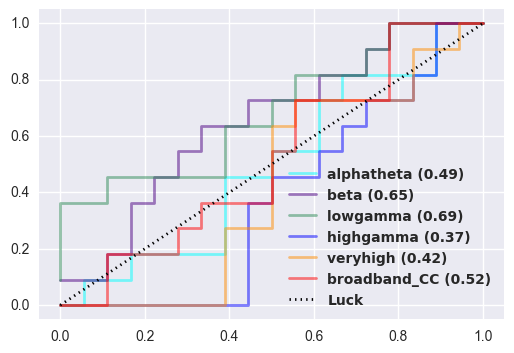

In [4]:
fig,axs = plt.subplots(1,1)
ax = axs
fig.set_size_inches((6,4))

width = 10
all_features = []
roc_results = []
for fconn in ['alphatheta','beta','lowgamma','highgamma','veryhigh','broadband_CC']:

    if(fconn == 'alphatheta'):
        title = 'Alpha/Theta: 5-15 Hz'
    if(fconn == 'beta'):
        title = 'Beta: 15-25 Hz'
    if(fconn == 'lowgamma'):
        title = 'Low Gamma: 30-40 Hz'
    if(fconn == 'highgamma'):
        title = 'High Gamma: 95-105 Hz'
    if(fconn == 'veryhigh'):
        title = 'Very High: 105-256+ Hz'
    if(fconn == 'broadband_CC'):
        title = 'Broadband Cross-Correlation'

    skip_chop = True
    skip_mayo = False
    skip_hup = False
    dilate_radius = 0
    all_nodal_results = all_freq_nodal_results[fconn]
    width = len(map(lambda x: x.values(), all_nodal_results.values())[0][0])
    num_fts = width

    clip_iter = 0
    patient_idx = all_nodal_results.keys()
    ft_matrix = np.zeros((sum(map(lambda x: bool(x), all_nodal_results.values())),num_fts+2))

    out_txt = 'pt_id,' #First column
    index_col = []    
    
    all_data = np.array(())

    for patient_id in sorted(patient_idx):
            if(skip_chop and 'CHOP' in patient_id):
                continue
            if(skip_mayo and 'Study' in patient_id):
                continue
            if(skip_hup and 'HUP' in patient_id):
                continue
            index_col.append(patient_id)
            
            for pid,clips in sorted(all_nodal_results.items(), key=lambda x:x[0]):
                if(pid != patient_id):
                    continue
                outcome = data['PATIENTS'][patient_id]['Outcome'] 
                
                avg_data = np.array(())
                for clip, clip_data in sorted(clips.items(), key=lambda x:x[0]):
                    if run_stereotype_only:
                        common_stype = scipy.stats.mode(map(lambda x: x['SeizurePhenotype'], data['PATIENTS'][patient_id]['Events']['Ictal'].values()))[0][0]
                        stype = data['PATIENTS'][patient_id]['Events']['Ictal'][clip]['SeizurePhenotype']
                        if stype != common_stype:
                            continue
                    res = clip_data                        
                    if(res.shape[0] == num_fts+1):
                        res = res[:num_fts]
                    try:                
                        avg_data = np.hstack((avg_data,np.reshape(res,(num_fts,1))))
                    except Exception:                
                        avg_data = np.reshape(res,(num_fts,1))                    
                #%DEBUG
#                     print patient_id, clip, avg_data.shape
                avg_data = np.nanmedian(avg_data,axis=1)

                # Update row_data
                row_data = np.append([clip_iter+1],avg_data)
                row_data = np.reshape(row_data, (row_data.shape[0],1))
                # Update header
                if(clip_iter == 0):
                    for t in range(1,num_fts+1):
                        out_txt += 'base_sync_'+str(t)+'_%s,'%fconn
                if(get_outcome(outcome) == 'Good'):        
                    row_data = np.append(row_data,[0])        
                else:
                    row_data = np.append(row_data,[1])
                row_data = np.reshape(row_data, (row_data.shape[0],1))
                try:
                    all_data = np.hstack((all_data, np.reshape(row_data,(num_fts+2,1))))
                except Exception:
                    all_data = row_data
                clip_iter += 1
    ft_matrix = np.array(all_data).T
    all_data = ft_matrix[:,1:width+1]
    outcomex = ft_matrix[:,width+1]
    
    good_outcome_feature = np.nanmedian(all_data[outcomex==0,width/2:],axis=1)-np.nanmedian(all_data[outcomex==0,:width/2],axis=1)
    poor_outcome_feature = np.nanmedian(all_data[outcomex==1,width/2:],axis=1)-np.nanmedian(all_data[outcomex==1,:width/2],axis=1)
    all_features.append(good_outcome_feature)
    all_features.append(poor_outcome_feature)
    s,p = scipy.stats.ranksums(good_outcome_feature, poor_outcome_feature)
    print fconn, s,p
    if p < 0.05:
        print fconn, s,p
    
    fpr,tpr,threshold = roc_curve(outcomex,np.nanmedian(all_data[:,width/2:],axis=1)-np.nanmedian(all_data[:,:width/2],axis=1))    
    roc_auc = auc(fpr,tpr)
    roc_results.append((fconn,roc_auc,fpr,tpr))
    print (fconn,roc_auc,fpr,tpr,threshold)

# ax = axs[1]
colors = ['cyan', 'indigo', 'seagreen', 'blue', 'darkorange', 'red']
i = 0
for fconn, roc_auc, fpr, tpr in roc_results:
    ax.plot(fpr, tpr, lw=2, color=colors[i], linestyle='-', label = '%s (%0.2f)'%(fconn,roc_auc), alpha=0.5)
    ax.hold(True)
    i += 1
# Plot the ROC curve for luck along with area
ax.plot([0, 1], [0, 1], linestyle=':', lw=2, color='k', label='Luck')
ax.set_xlim([-0.05, 1.05])
ax.set_ylim([-0.05, 1.05])

# ax.set_xlabel('1 - Specificity',fontdict={'size':14,'weight':'bold'})
# ax.set_ylabel('Sensitivity',fontdict={'size':14,'weight':'bold'})
ax.legend(loc="lower right",prop={'size':10,'weight':'bold', 'family':'normal'})
plt.show()


In [5]:
run_stereotype_only = False
width = 10
all_freq_nodal_results = {}
for fconn in ['alphatheta','beta','lowgamma','highgamma','veryhigh','broadband_CC']:
    # All cres
    results = {}
    if width == -1:
        raise 'NOT IMPLEMENTED FOR WIDTH -1'

    for patient_id in ['Study004','Study021','Study023','Study026','Study033','Study038']:
        comp_dir = os.path.join(os.path.expanduser(data['COMP_DIR']),patient_id,'aim3')

        # Open all adj
        try:
            for fn in os.listdir(comp_dir):
                if('noderes' in fn and 'csv' not in fn):
                    if(patient_id not in results.keys()):
                        results[patient_id] = {}
                    # print fn
                    clip_id = fn.split('.')[2]
                    if clip_id == '1000':
                        continue
                    seizure_type = data['PATIENTS'][patient_id]['Events']['Ictal'][clip_id]['SeizureType']
                    # if('CPS' not in seizure_type):
                    #     continue
                    results[patient_id][fn.split('.')[2]] = np.load('%s/%s'%(comp_dir,fn))['control_centrality_%s'%fconn]
        except:
            continue
    norm_results = {}
    for patient_id in ['Study004','Study021','Study023','Study026','Study033','Study038']:
        try:
            resected_node_idx, non_resected_node_idx, channels = get_resected_node_dx(patient_id)
        except KeyError:
            continue
        norm_results[patient_id] = {}
        for clip_id in data['PATIENTS'][patient_id]['Events']['Ictal'].keys():
            if clip_id == '1000':
                continue
            try:
                nodal_control_centrality = results[patient_id][clip_id]
            except KeyError:
                continue

            nodal_control_centrality = np.nanmean(nodal_control_centrality[resected_node_idx,:],axis=0).flatten()
            xp = np.linspace(-1.0,1.0,nodal_control_centrality.shape[0])
            norm_results[patient_id][clip_id] = np.interp(np.linspace(-1.0,1.0,width),xp,nodal_control_centrality)
    all_freq_nodal_results[fconn] = norm_results

In [6]:
all_freq_nodal_results

{'alphatheta': {'Study004': {u'1': array([ -4.38027212e-03,   6.47463964e-03,  -5.58155613e-05,
            6.68480362e-03,  -3.83702975e-04,   6.75458621e-03,
           -2.57390449e-03,  -1.04595365e-03,   2.04902478e-04,
           -1.64226311e-03]),
   u'2': array([ 0.00475481, -0.00115488,  0.00700865, -0.00016533,  0.0040373 ,
           0.00773759,  0.00233183,  0.00479618, -0.00092915, -0.00073311]),
   u'3': array([-0.00500017, -0.00131812, -0.001674  ,  0.00032448,  0.00068804,
           0.00853497,  0.01040705,  0.00588579,  0.00247016, -0.00467496])},
  'Study021': {u'1': array([ 0.00057839, -0.00051499, -0.00069943, -0.0017873 , -0.00276199,
          -0.00128359, -0.00196711,  0.01138108,  0.01070422,  0.00274636]),
   u'2': array([-0.00081677, -0.00122341,  0.00347322, -0.00029078,  0.00178127,
          -0.00155081,  0.00126547,  0.00093036, -0.00279206, -0.00046483]),
   u'4': array([ 0.00131022, -0.00096852, -0.00028203, -0.00068997, -0.00179031,
          -0.0016029

alphatheta [ 0.    0.25  0.25  1.  ] [ 0.  0.  1.  1.] [  1.00362676e+00   3.62675595e-03   2.38765032e-03  -6.92474982e-05] [ 1.  0.  0.  0.  0.] [  2.38765032e-03   1.67658896e-03   3.62675595e-03  -6.92474982e-05
   3.64352975e-04]
beta [ 0.    0.25  1.    1.  ] [ 0.  0.  0.  1.] [  1.00070677e+00   7.06772201e-04  -6.43706051e-04  -2.39673581e-03] [ 1.  0.  0.  0.  0.] [ -2.39673581e-03   3.68092754e-05   7.06772201e-04  -6.43706051e-04
   4.71566389e-04]
lowgamma [ 0.    0.25  0.5   0.5   1.  ] [ 0.  0.  0.  1.  1.] [  1.00756716e+00   7.56716319e-03   2.12712654e-03   1.10319342e-03
  -9.80981719e-05] [ 1.  0.  0.  0.  0.] [  1.10319342e-03   8.04675184e-04   7.56716319e-03   2.12712654e-03
  -9.80981719e-05]
highgamma [ 0.  1.] [ 1.  1.] [ 0.00350292 -0.00119183] [ 1.  0.  0.  0.  0.] [ 0.00350292  0.0011262  -0.00119183  0.00119952  0.00119246]
veryhigh [ 0.    0.25  0.75  0.75  1.  ] [ 0.  0.  0.  1.  1.] [  1.00118538e+00   1.18538142e-03   6.95300794e-04   3.48646415e-04
  -

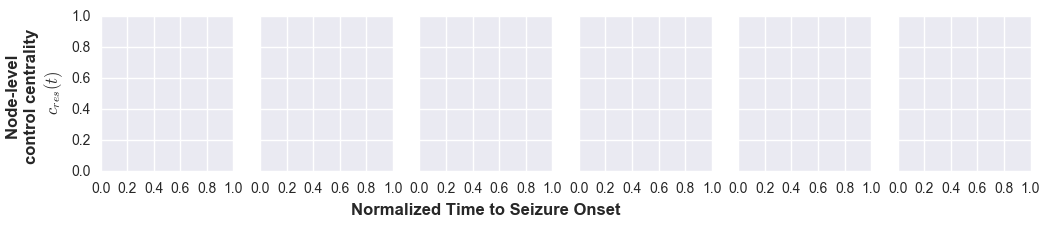

In [7]:
width = 10

# Figure font options
font1 = {'family':'raleway',
        'color': 'lightblue',
        'weight':'bold',
        'size':8,
        }
font2 = {'family':'raleway',
        'color': 'darkred',
        'weight':'bold',
        'size':8,
        }

max_y = 0.02
# max_y = 3.0
min_y = -0.01
# min_y = -3.0
star_y = 0.015

fig,axs = plt.subplots(1,6,sharey=True, sharex=True)
fig.set_size_inches((12,2))

for ax, fconn in zip(axs,['alphatheta','beta','lowgamma','highgamma','veryhigh','broadband_CC']):

    if(fconn == 'alphatheta'):
        title = 'Alpha/Theta: 5-15 Hz'
    if(fconn == 'beta'):
        title = 'Beta: 15-25 Hz'
    if(fconn == 'lowgamma'):
        title = 'Low Gamma: 30-40 Hz'
    if(fconn == 'highgamma'):
        title = 'High Gamma: 95-105 Hz'
    if(fconn == 'veryhigh'):
        title = 'Very High: 105-256+ Hz'
    if(fconn == 'broadband_CC'):
        title = 'Broadband Cross-Correlation'

    skip_chop = True
    skip_mayo = False
    skip_hup = False
    dilate_radius = 0
#     all_nodal_results = gather_resection_norm_nodal_results(fconn=fconn,width=width)
    all_nodal_results = all_freq_nodal_results[fconn]
    num_fts = width

    pt_iter = 0
    patient_idx = all_nodal_results.keys()
    ft_matrix = []

    out_txt = 'pt_id,' #First column
    index_col = []    

    for patient_id in ['Study004','Study021','Study023','Study026','Study038']:
        if(skip_chop and 'CHOP' in patient_id):
            continue
        if(skip_mayo and 'Study' in patient_id):
            continue
        if(skip_hup and 'HUP' in patient_id):
            continue

        index_col.append(patient_id)
        row_data = np.array((pt_iter+1,))    
        if patient_id == 'Study033':
            continue
        for pid,clips in sorted(all_nodal_results.items(), key=lambda x:x[0]):                    
            if(pid != patient_id):
                continue
            outcome = data['PATIENTS'][patient_id]['Outcome']

            avg_data = np.array(())                    
            for clip, clip_data in sorted(clips.items(), key=lambda x:x[0]):
                if run_stereotype_only:
                    common_stype = scipy.stats.mode(map(lambda x: x['SeizurePhenotype'], data['PATIENTS'][patient_id]['Events']['Ictal'].values()))[0][0]
                    stype = data['PATIENTS'][patient_id]['Events']['Ictal'][clip]['SeizurePhenotype']
                    if stype != common_stype:
                        continue
                res = clip_data                        
                if(res.shape[0] == num_fts+1):
                    res = res[:num_fts]
                try:                
                    avg_data = np.hstack((avg_data,np.reshape(res,(num_fts,1))))
                except Exception:                
                    avg_data = np.reshape(res,(num_fts,1))                    
            avg_data = np.nanmedian(avg_data,axis=1)

            # Update row_data
            row_data = np.hstack((row_data,avg_data)) 

            # Update header
            if(pt_iter == 0):
                for t in range(1,num_fts+1):
                    out_txt += 'base_sync_'+str(t)+'_%s,'%fconn
        if(get_outcome(outcome) == 'Good'):        
            row_data = np.hstack((row_data,[0]))        
        else:
            row_data = np.hstack((row_data,[1]))
        if(row_data.shape[0] != num_fts+2):
            continue
        ft_matrix.append(row_data)
        pt_iter += 1
    ft_matrix = np.array(ft_matrix)
    all_data = ft_matrix[:,1:width+1]
    outcomex = ft_matrix[:,width+1]
    good_outcome_data = all_data[outcomex==0,:]
    poor_outcome_data = all_data[outcomex==1,:]

    good_outcome_data_err = scipy.stats.sem(good_outcome_data,axis=0,nan_policy='omit')

    poor_outcome_data_err = scipy.stats.sem(poor_outcome_data,axis=0,nan_policy='omit')

    font = {'family' : 'Raleway',
        'weight' : 'normal',
        'size'   : 32}
    matplotlib.rc('font', **font)
    matplotlib.rcParams['axes.titlesize'] = 36
    matplotlib.rcParams['axes.titleweight'] = 'bold'
    matplotlib.rcParams['axes.labelsize'] = 32
    matplotlib.rcParams['axes.labelweight'] = 'bold'
    matplotlib.rcParams['ytick.labelsize'] = 16
    matplotlib.rcParams['xtick.labelsize'] = 16
    matplotlib.rcParams['axes.labelcolor'] = 'black'

    
    if(fconn == 'alphatheta'):
        title = 'Alpha/Theta:\n 5-15 Hz'
        ax.set_ylabel('Node-level \ncontrol centrality \n $c_{res}(t)$',fontdict={'size':12,'weight':'bold'})
    if(fconn == 'beta'):
        title = 'Beta:\n 15-25 Hz'
    if(fconn == 'lowgamma'):
        title = 'Low Gamma:\n 30-40 Hz'
        ax.set_xlabel('Normalized Time to Seizure Onset',fontdict={'size':12,'weight':'bold'})
    if(fconn == 'highgamma'):
        title = 'High Gamma:\n 95-105 Hz'
    if(fconn == 'veryhigh'):
        title = 'Very High:\n 105-256+ Hz'
    if(fconn == 'broadband_CC'):
        title = 'Broadband\n Cross-Correlation'
    
    # Make significance indicators

    fpr,tpr,threshold = roc_curve(outcomex,np.nanmedian(all_data[:,width/2:],axis=1)-np.nanmedian(all_data[:,:width/2],axis=1))    
    print fconn,fpr,tpr,threshold,outcomex,np.nanmedian(all_data[:,width/2:],axis=1)-np.nanmedian(all_data[:,:width/2],axis=1)


In [ ]:
 2.28101689e-03

<h1>Interictal plot of distirubtion </h1>

In [11]:
run_stereotype_only = False
all_nodal_results = gather_nodal_results(fconn='highgamma')
PATIENT_IDX = sorted(all_nodal_results.keys())
comp_dir = os.path.expanduser(data['COMP_DIR'])

# Collect data
# Initialize boxplot arrays
good_res = {}
poor_res = {}

for fconn in ['alphatheta','beta','lowgamma','highgamma','veryhigh','broadband_CC']:
    # All nodal results
    all_nodal_results = gather_nodal_results(fconn=fconn)
    try:
        good_res[fconn]        
    except KeyError:
        good_res[fconn] = []
        poor_res[fconn] = []
    for patient_id in PATIENT_IDX:
        # Get outcome
        outcome = data['PATIENTS'][patient_id]['Outcome']
        outcome = get_outcome(outcome)
        res = []
        
        # Get resected nodes and non-resected nodes
        first_clip_id = data['PATIENTS'][patient_id]['Events']['Ictal'].keys()[0]
        nodal_control_centrality = all_nodal_results[patient_id][first_clip_id]
        resected_node_idx, non_resected_node_idx, channels = get_resected_node_dx(patient_id)

        if outcome == 'Good':
            # Load event
            for clip_id in data['PATIENTS'][patient_id]['Events']['Ictal'].keys():
                if clip_id != '1000':
                    continue

                event = data['PATIENTS'][patient_id]['Events']['Ictal'][clip_id]
                try:
                    nodal_control_centrality = all_nodal_results[patient_id][clip_id]
                except KeyError:
                    continue

                nodal_control_centrality = nodal_control_centrality[:,:]
                mean_nodal_control_centrality = np.nanmean(nodal_control_centrality, axis=1)
                
                res.append(np.nanmean(mean_nodal_control_centrality[resected_node_idx]))
            if not np.isnan(np.nanmean(res)):
                good_res[fconn].append(np.nanmean(res))
        if outcome == 'Poor':
            # Load event
            for clip_id in data['PATIENTS'][patient_id]['Events']['Ictal'].keys():
                if clip_id != '1000':
                    continue
                event = data['PATIENTS'][patient_id]['Events']['Ictal'][clip_id]
                try:
                    nodal_control_centrality = all_nodal_results[patient_id][clip_id]
                except KeyError:
                    continue

                nodal_control_centrality = nodal_control_centrality[:,:]
                mean_nodal_control_centrality = np.nanmean(nodal_control_centrality, axis=1)
                res.append(np.nanmean(mean_nodal_control_centrality[resected_node_idx]))                
            if not np.isnan(np.nanmean(res)):
                poor_res[fconn].append(np.nanmean(res))
            

In [12]:
print good_res, poor_res

{'veryhigh': [0.00055623455879798137, 0.0026696082433447323, 0.0014502284664101226, -0.00066072554578879429, 0.0014812431262149308], 'lowgamma': [-0.0015095017693332023, -0.0019544962611577933, 0.00091271311457037478, 0.0020119966661265197, -0.0003810367829721111], 'alphatheta': [0.0013950785995989559, 0.0022073074483407239, 0.0010580659753259367, 5.1414955393050513e-05, -0.0011168088539427559], 'highgamma': [-0.00057441110699953059, -0.0013367760141726128, 0.0022648302964041636, -0.0016233524088375242, 0.00085026714184207545], 'broadband_CC': [0.00084911733889727985, 0.0021390722434863731, 0.001026630379942071, 0.00011429019080400594, 0.00066850821150887352], 'beta': [-0.00040265265027611722, -0.00011654910163004438, 0.0011254020862879412, 0.0025891874392588664, 4.8892805012340675e-05]} {'veryhigh': [0.00030306864427854564, 0.0027318866194729224], 'lowgamma': [-0.0014419349705266124, -0.0031499990932334684], 'alphatheta': [0.0017306830215693086, -0.0016052674123011933], 'highgamma': [

Alpha/Theta:
 5-15 Hz post 0.387298334621 0.698535358303 0.420720480085
Beta:
 15-25 Hz post 0.774596669241 0.438578026081 1.30369550179
Low Gamma:
 30-40 Hz post 1.16189500386 0.245278116807 1.34028339451
High Gamma:
 95-105 Hz post -0.774596669241 0.438578026081 -0.443292464656
Very High:
 105-256+ Hz post -0.387298334621 0.698535358303 -0.310351665583
Broadband
 Cross-Correlation post 0.387298334621 0.698535358303 0.850048098432


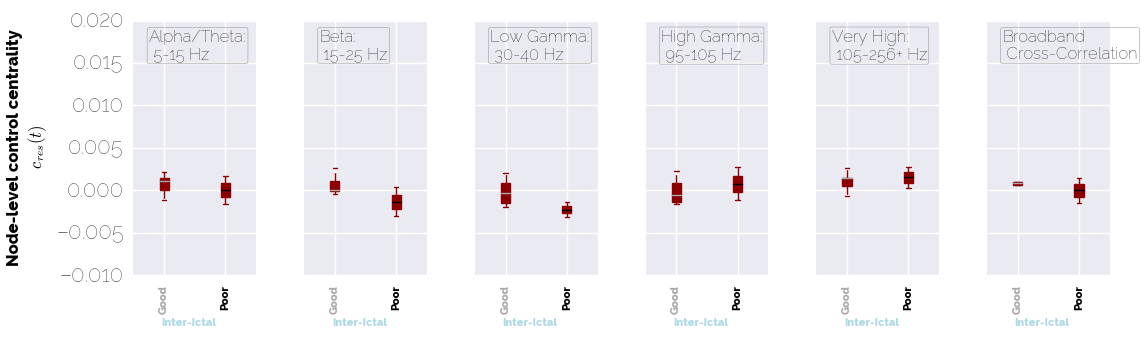

In [14]:
# Figure font options
font1 = {'family':'raleway',
        'color': 'lightblue',
        'weight':'bold',
        'size':8,
        }
font2 = {'family':'raleway',
        'color': 'darkred',
        'weight':'bold',
        'size':8,
        }

max_y = 0.02
# max_y = 3.0
min_y = -0.01
# min_y = -3.0
star_y = 0.015


# Make function to change boxplot colors
def draw_plot(data, edge_color, fill_color):
    bp = ax.boxplot(data, patch_artist=True)
#     print bp['boxes']
    for element in ['boxes','whiskers','fliers','medians','caps']:
        for i in range(len(bp[element])):                
            if element is 'medians':
                plt.setp(bp[element][i], color=fill_color[i][1])
            elif element is 'whiskers' or element is 'caps':
                plt.setp(bp[element][i], color=edge_color[i/2])
            else:
                plt.setp(bp[element][i], color=edge_color[i])
    for i,patch in enumerate(bp['boxes']):
        patch.set(hatch=fill_color[i][0])

fig,axs = plt.subplots(1,6,sharey=True)
# fig.set_figwidth(2.75591)
fig.set_size_inches((12,4))
# fig.suptitle('Resection ',fontdict={'family':'raleway','size':18,'color':'black'})
for ax, fconn in zip(axs,['alphatheta','beta','lowgamma','highgamma','veryhigh','broadband_CC']):
    if(fconn == 'alphatheta'):
        title = 'Alpha/Theta:\n 5-15 Hz'
        ax.set_ylabel('Node-level control centrality\n $c_{res}(t)$',fontdict={'size':12,'weight':'bold'})
    if(fconn == 'beta'):
        title = 'Beta:\n 15-25 Hz'
    if(fconn == 'lowgamma'):
        title = 'Low Gamma:\n 30-40 Hz'
    if(fconn == 'highgamma'):
        title = 'High Gamma:\n 95-105 Hz'
    if(fconn == 'veryhigh'):
        title = 'Very High:\n 105-256+ Hz'
    if(fconn == 'broadband_CC'):
        title = 'Broadband\n Cross-Correlation'

#     ax.boxplot([good_pre_res[fconn],poor_pre_res[fconn],good_res[fconn],poor_res[fconn]])
    draw_plot([good_res[fconn],poor_res[fconn]],
              ['darkred','darkred'],
              [('/','darkgray'),('/','black')])

    s,post_p = scipy.stats.ranksums(good_res[fconn], poor_res[fconn])
    cd = cohen_d(good_res[fconn], poor_res[fconn])
    print title, 'post',s,post_p, cd

    ax.text(0.95,min_y-(max_y-min_y)*0.2,'Inter-Ictal',fontdict=font1)
    ax.text(0.75, max_y-(max_y-min_y)*0.15,title, \
            fontdict={'family':'raleway','size':12,'color':'black'}, \
            bbox=dict(facecolor='none',edgecolor='gray',boxstyle='round,pad=0.1'))
    ax.set_ylim([min_y,max_y])
    ax.set_xticks([1,2])
    ax.set_xticklabels(['Good','Poor'],fontdict={'size':8,'weight':'bold'},rotation='vertical')
    for ii in range(1,2,2):
        ax.get_xticklabels()[ii].set_color('black')
    for ii in range(0,2,2):
        ax.get_xticklabels()[ii].set_color('darkgray')
    
    
    if post_p < 0.001:
        ax.text(1.0,star_y,'***',{'weight':'bold', 'size':14})
    elif post_p < 0.01:
        ax.text(1.0,star_y,'**',{'weight':'bold', 'size':14})
    elif post_p < 0.05:
        ax.text(1.0,star_y,'*',{'weight':'bold', 'size':14})
    elif post_p < 0.1:
        ax.text(1.0,star_y,'p=%0.2f'%post_p,{'weight':'normal', 'size':12})
        
plt.tight_layout()
plt.show()
# if run_stereotype_only:
#     fig.savefig('%s/../fig/FigureS18.png'%(comp_dir))
# else:
#     fig.savefig('%s/../fig/FigureS9.png'%(comp_dir))



<h1> Figure S??. INTERICTAL Node-level control centrality of Time-Varying Functional Network </h1>

In [15]:
run_stereotype_only = False
width = 10
all_freq_nodal_results = {}
for fconn in ['alphatheta','beta','lowgamma','highgamma','veryhigh','broadband_CC']:
    # All cres
    results = {}
    if width == -1:
        raise 'NOT IMPLEMENTED FOR WIDTH -1'

    for patient_id in os.listdir(os.path.expanduser(data['COMP_DIR'])):
        if(patient_id == 'TEST1'):
            continue
        try:
            if not len(data['PATIENTS'][patient_id]['ELECTRODE_LABELS'].split('/')[-1].split('_')) > 4:
                continue
        except KeyError:
            continue
        comp_dir = os.path.join(os.path.expanduser(data['COMP_DIR']),patient_id,'aim3')

        # Open all adj
        try:
            for fn in os.listdir(comp_dir):
                if('noderes' in fn and 'csv' not in fn):
                    if(patient_id not in results.keys()):
                        results[patient_id] = {}
                    # print fn
                    clip_id = fn.split('.')[2]
                    if clip_id != '1000':
                        continue
                    seizure_type = data['PATIENTS'][patient_id]['Events']['Ictal'][clip_id]['SeizureType']
                    # if('CPS' not in seizure_type):
                    #     continue
                    results[patient_id][fn.split('.')[2]] = np.load('%s/%s'%(comp_dir,fn))['control_centrality_%s'%fconn]
        except:
            continue
    norm_results = {}
    for patient_id in os.listdir(os.path.expanduser(data['COMP_DIR'])):
        if(patient_id == 'TEST1'):
            continue
        try:
            if not len(data['PATIENTS'][patient_id]['ELECTRODE_LABELS'].split('/')[-1].split('_')) > 4:
                continue
        except KeyError:
            continue
        try:
            resected_node_idx, non_resected_node_idx, channels = get_resected_node_dx(patient_id)
        except KeyError:
            continue
        norm_results[patient_id] = {}
        for clip_id in data['PATIENTS'][patient_id]['Events']['Ictal'].keys():
            if clip_id != '1000':
                continue
            try:
                nodal_control_centrality = results[patient_id][clip_id]
            except KeyError:
                continue

            nodal_control_centrality = np.nanmean(nodal_control_centrality[resected_node_idx,:],axis=0).flatten()
            xp = np.linspace(-1.0,1.0,nodal_control_centrality.shape[0])
            norm_results[patient_id][clip_id] = np.interp(np.linspace(-1.0,1.0,width),xp,nodal_control_centrality)
    all_freq_nodal_results[fconn] = norm_results

In [16]:
all_freq_nodal_results

{'alphatheta': {u'HUP064': {u'1000': array([ 0.00378158,  0.00377366,  0.00349913, -0.00139631, -0.00251784,
           0.00713041, -0.00034335,  0.0010538 ,  0.00596238,  0.00688664])},
  u'HUP065': {u'1000': array([ 0.00219088, -0.00302151,  0.00402664, -0.0010913 , -0.00218943,
           0.0028726 , -0.00142746,  0.00202943,  0.01440303,  0.00126867])},
  u'HUP068': {u'1000': array([-0.00070674, -0.0001361 ,  0.00634209, -0.00272073, -0.00159408,
           0.00408761, -0.0002052 ,  0.00385671,  0.00234022, -0.00306118])},
  u'HUP070': {u'1000': array([-0.001612  ,  0.00110484, -0.00047904, -0.00193571,  0.00334467,
          -0.00305268, -0.00454613,  0.00546875,  0.00019732,  0.00099553])},
  u'HUP073': {u'1000': array([ 0.00525634, -0.00345755, -0.00263074,  0.00473237, -0.00620821,
           0.01743812, -0.00817943,  0.00208326,  0.00310979, -0.00112091])},
  u'HUP074': {},
  u'HUP075': {},
  u'HUP078': {},
  u'HUP080': {},
  u'HUP082': {},
  u'HUP083': {},
  u'HUP086': {},
  

0.0 0.1404 0.2
0.1024 0.1954 0.5
0.3907 0.9164 0.6
0.5737 0.4345 1.0
0.3788 0.9553 0.9
0.3818 0.2275 0.2


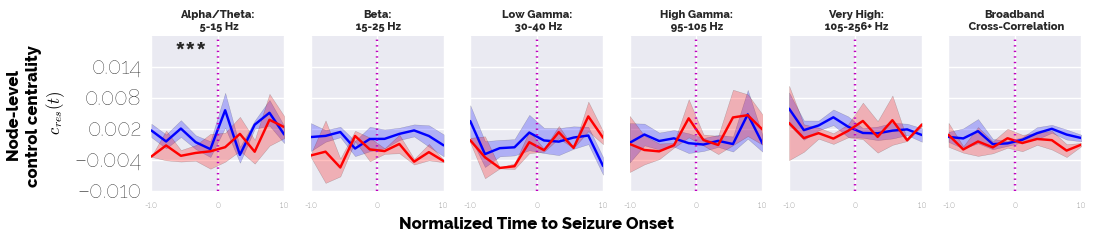

In [18]:
width = 10

# Figure font options
font1 = {'family':'raleway',
        'color': 'lightblue',
        'weight':'bold',
        'size':8,
        }
font2 = {'family':'raleway',
        'color': 'darkred',
        'weight':'bold',
        'size':8,
        }

max_y = 0.02
# max_y = 3.0
min_y = -0.01
# min_y = -3.0
star_y = 0.015

fig,axs = plt.subplots(1,6,sharey=True, sharex=True)
fig.set_size_inches((12,2))

for ax, fconn in zip(axs,['alphatheta','beta','lowgamma','highgamma','veryhigh','broadband_CC']):

    if(fconn == 'alphatheta'):
        title = 'Alpha/Theta: 5-15 Hz'
    if(fconn == 'beta'):
        title = 'Beta: 15-25 Hz'
    if(fconn == 'lowgamma'):
        title = 'Low Gamma: 30-40 Hz'
    if(fconn == 'highgamma'):
        title = 'High Gamma: 95-105 Hz'
    if(fconn == 'veryhigh'):
        title = 'Very High: 105-256+ Hz'
    if(fconn == 'broadband_CC'):
        title = 'Broadband Cross-Correlation'

    skip_chop = True
    skip_mayo = False
    skip_hup = False
    dilate_radius = 0
#     all_nodal_results = gather_resection_norm_nodal_results(fconn=fconn,width=width)
    all_nodal_results = all_freq_nodal_results[fconn]
    num_fts = width

    pt_iter = 0
    patient_idx = all_nodal_results.keys()
    ft_matrix = []

    out_txt = 'pt_id,' #First column
    index_col = []    

    for patient_id in sorted(patient_idx):
        if(skip_chop and 'CHOP' in patient_id):
            continue
        if(skip_mayo and 'Study' in patient_id):
            continue
        if(skip_hup and 'HUP' in patient_id):
            continue

        index_col.append(patient_id)
        row_data = np.array((pt_iter+1,))    
        for pid,clips in sorted(all_nodal_results.items(), key=lambda x:x[0]):                    
            if(pid != patient_id):
                continue
            outcome = data['PATIENTS'][patient_id]['Outcome']

            avg_data = np.array(())       
            if clips == {}:
                continue
            for clip, clip_data in sorted(clips.items(), key=lambda x:x[0]):
                if run_stereotype_only:
                    common_stype = scipy.stats.mode(map(lambda x: x['SeizurePhenotype'], data['PATIENTS'][patient_id]['Events']['Ictal'].values()))[0][0]
                    stype = data['PATIENTS'][patient_id]['Events']['Ictal'][clip]['SeizurePhenotype']
                    if stype != common_stype:
                        continue
                res = clip_data                        
                if(res.shape[0] == num_fts+1):
                    res = res[:num_fts]
                try:                
                    avg_data = np.hstack((avg_data,np.reshape(res,(num_fts,1))))
                except Exception:                
                    avg_data = np.reshape(res,(num_fts,1))                    
            avg_data = np.nanmedian(avg_data,axis=1)

            # Update row_data
            row_data = np.hstack((row_data,avg_data)) 

            # Update header
            if(pt_iter == 0):
                for t in range(1,num_fts+1):
                    out_txt += 'base_sync_'+str(t)+'_%s,'%fconn
        if(get_outcome(outcome) == 'Good'):        
            row_data = np.hstack((row_data,[0]))        
        else:
            row_data = np.hstack((row_data,[1]))
        if(row_data.shape[0] != num_fts+2):
            continue
        ft_matrix.append(row_data)
        pt_iter += 1
    ft_matrix = np.array(ft_matrix)
    all_data = ft_matrix[:,1:width+1]
    outcomex = ft_matrix[:,width+1]
    good_outcome_data = all_data[outcomex==0,:]
    poor_outcome_data = all_data[outcomex==1,:]

    good_outcome_data_err = scipy.stats.sem(good_outcome_data,axis=0,nan_policy='omit')

    poor_outcome_data_err = scipy.stats.sem(poor_outcome_data,axis=0,nan_policy='omit')

    font = {'family' : 'Raleway',
        'weight' : 'normal',
        'size'   : 32}
    matplotlib.rc('font', **font)
    matplotlib.rcParams['axes.titlesize'] = 36
    matplotlib.rcParams['axes.titleweight'] = 'bold'
    matplotlib.rcParams['axes.labelsize'] = 32
    matplotlib.rcParams['axes.labelweight'] = 'bold'
    matplotlib.rcParams['ytick.labelsize'] = 16
    matplotlib.rcParams['xtick.labelsize'] = 16
    matplotlib.rcParams['axes.labelcolor'] = 'black'

    
    if(fconn == 'alphatheta'):
        title = 'Alpha/Theta:\n 5-15 Hz'
        ax.set_ylabel('Node-level \ncontrol centrality \n $c_{res}(t)$',fontdict={'size':12,'weight':'bold'})
    if(fconn == 'beta'):
        title = 'Beta:\n 15-25 Hz'
    if(fconn == 'lowgamma'):
        title = 'Low Gamma:\n 30-40 Hz'
        ax.set_xlabel('Normalized Time to Seizure Onset',fontdict={'size':12,'weight':'bold'})
    if(fconn == 'highgamma'):
        title = 'High Gamma:\n 95-105 Hz'
    if(fconn == 'veryhigh'):
        title = 'Very High:\n 105-256+ Hz'
    if(fconn == 'broadband_CC'):
        title = 'Broadband\n Cross-Correlation'
    
    ax.plot(np.linspace(-1.0,1.0,num_fts),np.nanmean(good_outcome_data,axis=0),'b')
    ax.hold(True)
    ax.fill_between(np.linspace(-1.0,1.0,num_fts),np.nanmean(good_outcome_data,axis=0)-good_outcome_data_err,np.nanmean(good_outcome_data,axis=0)+good_outcome_data_err,facecolor='blue',alpha=0.25)
    ax.plot(np.linspace(-1.0,1.0,num_fts),np.nanmean(poor_outcome_data,axis=0), 'r')
    ax.fill_between(np.linspace(-1.0,1.0,num_fts),np.nanmean(poor_outcome_data,axis=0)-poor_outcome_data_err,np.nanmean(poor_outcome_data,axis=0)+poor_outcome_data_err,facecolor='red',alpha=0.25)
    ax.set_xlim(( -1.0, 1.0))    
    ax.set_ylim((min_y, max_y))
    ax.plot([0,0],[min_y,max_y],color='m',linestyle=':')
    ax.set_yticks(np.arange(min_y,max_y,(max_y-min_y)/5.0))
    
    ax.set_xticks([-1.0,0,1.0])
    ax.set_xticklabels([-1.0,0,1.0],fontdict={'size':6,'weight':'normal'})

    ax.set_title(title,fontdict={'size':8,'weight':'bold'})    
    
    ax.grid(True)
    
    # Make significance indicators

    fpr,tpr,threshold = roc_curve(outcomex,np.nanmedian(all_data[:,width/2:],axis=1)-np.nanmedian(all_data[:,:width/2],axis=1))    
    roc_auc = auc(fpr,tpr)
    pre_p = curve_test(all_data[:,:all_data.shape[0]/2].T,np.where(outcomex==0)[0],np.where(outcomex==1)[0],10000)
    post_p = curve_test(all_data[:,all_data.shape[0]/2:].T,np.where(outcomex==0)[0],np.where(outcomex==1)[0],10000)
    if pre_p < 0.001:
        ax.text(-0.65,star_y, '***',{'weight':'bold', 'size':22})
    elif pre_p < 0.01:
        ax.text(-0.65,star_y, '**',{'weight':'bold', 'size':22})
    elif pre_p < 0.05:
        ax.text(-0.65,star_y, '*',{'weight':'bold', 'size':22})
    elif pre_p < 0.1:
        ax.text(-0.65,star_y, 'p=%0.2f'%pre_p,{'weight':'normal', 'size':22})
    
    if post_p < 0.001:
        ax.text(0.35,star_y, '***',{'weight':'bold', 'size':22})
    elif post_p < 0.01:
        ax.text(0.35,star_y, '**',{'weight':'bold', 'size':22})
    elif post_p < 0.05:
        ax.text(0.35,star_y, '*',{'weight':'bold', 'size':22})
    elif post_p < 0.1:
        ax.text(0.35,star_y, 'p=%0.2f'%post_p,{'weight':'normal', 'size':22})

    print pre_p, post_p, roc_auc

# if run_stereotype_only:
#     blah
#     plt.savefig('../../fig/FigureS19.png',bbox_inches='tight', format='png', dpi=1200)
# else:
#     blah
#     plt.savefig('../../fig/FigureS10.png',bbox_inches='tight', format='png', dpi=1200)
plt.show()

In [19]:
run_stereotype_only = False
width = 10
all_freq_nodal_results = {}
for fconn in ['alphatheta','beta','lowgamma','highgamma','veryhigh','broadband_CC']:
    # All cres
    results = {}
    if width == -1:
        raise 'NOT IMPLEMENTED FOR WIDTH -1'

    for patient_id in os.listdir(os.path.expanduser(data['COMP_DIR'])):
        if(patient_id == 'TEST1'):
            continue
        try:
            if not len(data['PATIENTS'][patient_id]['ELECTRODE_LABELS'].split('/')[-1].split('_')) > 4:
                continue
        except KeyError:
            continue
        comp_dir = os.path.join(os.path.expanduser(data['COMP_DIR']),patient_id,'aim3')

        # Open all adj
        try:
            for fn in os.listdir(comp_dir):
                if('noderes' in fn and 'csv' not in fn):
                    if(patient_id not in results.keys()):
                        results[patient_id] = {}
                    # print fn
                    clip_id = fn.split('.')[2]
                    if clip_id != '1000':
                        continue
                    seizure_type = data['PATIENTS'][patient_id]['Events']['Ictal'][clip_id]['SeizureType']
                    # if('CPS' not in seizure_type):
                    #     continue
                    results[patient_id][fn.split('.')[2]] = np.load('%s/%s'%(comp_dir,fn))['control_centrality_%s'%fconn]
        except:
            continue
    norm_results = {}
    for patient_id in os.listdir(os.path.expanduser(data['COMP_DIR'])):
        if(patient_id == 'TEST1'):
            continue
        try:
            if not len(data['PATIENTS'][patient_id]['ELECTRODE_LABELS'].split('/')[-1].split('_')) > 4:
                continue
        except KeyError:
            continue
        try:
            resected_node_idx, non_resected_node_idx, channels = get_resected_node_dx(patient_id)
        except KeyError:
            continue
        norm_results[patient_id] = {}
        for clip_id in data['PATIENTS'][patient_id]['Events']['Ictal'].keys():
            if clip_id != '1000':
                continue
            try:
                nodal_control_centrality = results[patient_id][clip_id]
            except KeyError:
                continue

            nodal_control_centrality = np.nanmean(nodal_control_centrality[resected_node_idx,:],axis=0).flatten()
            xp = np.linspace(-1.0,1.0,nodal_control_centrality.shape[0])
            norm_results[patient_id][clip_id] = np.interp(np.linspace(-1.0,1.0,width),xp,nodal_control_centrality)
    all_freq_nodal_results[fconn] = norm_results

In [20]:
all_freq_nodal_results

{'alphatheta': {u'HUP064': {u'1000': array([ 0.00378158,  0.00377366,  0.00349913, -0.00139631, -0.00251784,
           0.00713041, -0.00034335,  0.0010538 ,  0.00596238,  0.00688664])},
  u'HUP065': {u'1000': array([ 0.00219088, -0.00302151,  0.00402664, -0.0010913 , -0.00218943,
           0.0028726 , -0.00142746,  0.00202943,  0.01440303,  0.00126867])},
  u'HUP068': {u'1000': array([-0.00070674, -0.0001361 ,  0.00634209, -0.00272073, -0.00159408,
           0.00408761, -0.0002052 ,  0.00385671,  0.00234022, -0.00306118])},
  u'HUP070': {u'1000': array([-0.001612  ,  0.00110484, -0.00047904, -0.00193571,  0.00334467,
          -0.00305268, -0.00454613,  0.00546875,  0.00019732,  0.00099553])},
  u'HUP073': {u'1000': array([ 0.00525634, -0.00345755, -0.00263074,  0.00473237, -0.00620821,
           0.01743812, -0.00817943,  0.00208326,  0.00310979, -0.00112091])},
  u'HUP074': {},
  u'HUP075': {},
  u'HUP078': {},
  u'HUP080': {},
  u'HUP082': {},
  u'HUP083': {},
  u'HUP086': {},
  

HUP064 {u'1000': array([ 0.00378158,  0.00377366,  0.00349913, -0.00139631, -0.00251784,
        0.00713041, -0.00034335,  0.0010538 ,  0.00596238,  0.00688664])}
HUP065 {u'1000': array([ 0.00219088, -0.00302151,  0.00402664, -0.0010913 , -0.00218943,
        0.0028726 , -0.00142746,  0.00202943,  0.01440303,  0.00126867])}
HUP068 {u'1000': array([-0.00070674, -0.0001361 ,  0.00634209, -0.00272073, -0.00159408,
        0.00408761, -0.0002052 ,  0.00385671,  0.00234022, -0.00306118])}
HUP070 {u'1000': array([-0.001612  ,  0.00110484, -0.00047904, -0.00193571,  0.00334467,
       -0.00305268, -0.00454613,  0.00546875,  0.00019732,  0.00099553])}
HUP073 {u'1000': array([ 0.00525634, -0.00345755, -0.00263074,  0.00473237, -0.00620821,
        0.01743812, -0.00817943,  0.00208326,  0.00310979, -0.00112091])}
Study016 {u'1000': array([ -3.31296435e-03,   1.76579773e-03,  -2.01285079e-03,
        -4.08132230e-03,   1.12191748e-03,   1.34640119e-03,
         4.41441894e-03,  -3.46574179e-05,  

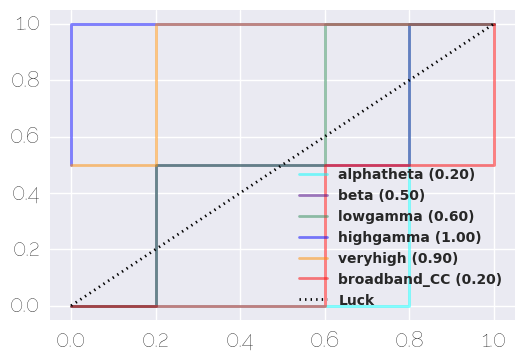

In [27]:
fig,axs = plt.subplots(1,1)
ax = axs
fig.set_size_inches((6,4))

width = 10
all_features = []
roc_results = []
for fconn in ['alphatheta','beta','lowgamma','highgamma','veryhigh','broadband_CC']:

    if(fconn == 'alphatheta'):
        title = 'Alpha/Theta: 5-15 Hz'
    if(fconn == 'beta'):
        title = 'Beta: 15-25 Hz'
    if(fconn == 'lowgamma'):
        title = 'Low Gamma: 30-40 Hz'
    if(fconn == 'highgamma'):
        title = 'High Gamma: 95-105 Hz'
    if(fconn == 'veryhigh'):
        title = 'Very High: 105-256+ Hz'
    if(fconn == 'broadband_CC'):
        title = 'Broadband Cross-Correlation'

    skip_chop = True
    skip_mayo = False
    skip_hup = False
    dilate_radius = 0
    all_nodal_results = all_freq_nodal_results[fconn]
    
#     width = len(map(lambda x: x.values(), all_nodal_results.values())[0][0])
    
    num_fts = width

    clip_iter = 0
    patient_idx = all_nodal_results.keys()
    ft_matrix = np.zeros((sum(map(lambda x: bool(x), all_nodal_results.values())),num_fts+2))

    out_txt = 'pt_id,' #First column
    index_col = []    
    
    all_data = np.array(())

    for patient_id in sorted(patient_idx):
            if(skip_chop and 'CHOP' in patient_id):
                continue
            if(skip_mayo and 'Study' in patient_id):
                continue
            if(skip_hup and 'HUP' in patient_id):
                continue
            index_col.append(patient_id)
            
            for pid,clips in sorted(all_nodal_results.items(), key=lambda x:x[0]):
                if(pid != patient_id):
                    continue
                outcome = data['PATIENTS'][patient_id]['Outcome'] 
                
                if clips == {}:
                    continue
                print pid,clips
                avg_data = np.array(())
                for clip, clip_data in sorted(clips.items(), key=lambda x:x[0]):
                    if run_stereotype_only:
                        common_stype = scipy.stats.mode(map(lambda x: x['SeizurePhenotype'], data['PATIENTS'][patient_id]['Events']['Ictal'].values()))[0][0]
                        stype = data['PATIENTS'][patient_id]['Events']['Ictal'][clip]['SeizurePhenotype']
                        if stype != common_stype:
                            continue
                    res = clip_data                        
                    if(res.shape[0] == num_fts+1):
                        res = res[:num_fts]
                    try:                
                        avg_data = np.hstack((avg_data,np.reshape(res,(num_fts,1))))
                    except Exception:                
                        avg_data = np.reshape(res,(num_fts,1))                    
                #%DEBUG
#                     print patient_id, clip, avg_data.shape
                avg_data = np.nanmedian(avg_data,axis=1)

                # Update row_data
                row_data = np.append([clip_iter+1],avg_data)
                row_data = np.reshape(row_data, (row_data.shape[0],1))
                # Update header
                if(clip_iter == 0):
                    for t in range(1,num_fts+1):
                        out_txt += 'base_sync_'+str(t)+'_%s,'%fconn
                if(get_outcome(outcome) == 'Good'):        
                    row_data = np.append(row_data,[0])        
                else:
                    row_data = np.append(row_data,[1])
                row_data = np.reshape(row_data, (row_data.shape[0],1))
                try:
                    all_data = np.hstack((all_data, np.reshape(row_data,(num_fts+2,1))))
                except Exception:
                    all_data = row_data
                clip_iter += 1
    ft_matrix = np.array(all_data).T
    all_data = ft_matrix[:,1:width+1]
    outcomex = ft_matrix[:,width+1]
    
    good_outcome_feature = np.nanmedian(all_data[outcomex==0,width/2:],axis=1)-np.nanmedian(all_data[outcomex==0,:width/2],axis=1)
    poor_outcome_feature = np.nanmedian(all_data[outcomex==1,width/2:],axis=1)-np.nanmedian(all_data[outcomex==1,:width/2],axis=1)
    all_features.append(good_outcome_feature)
    all_features.append(poor_outcome_feature)
    s,p = scipy.stats.ranksums(good_outcome_feature, poor_outcome_feature)
    print fconn, s,p
    if p < 0.05:
        print fconn, s,p
    
    fpr,tpr,threshold = roc_curve(outcomex,np.nanmedian(all_data[:,width/2:],axis=1)-np.nanmedian(all_data[:,:width/2],axis=1))    
    roc_auc = auc(fpr,tpr)
    roc_results.append((fconn,roc_auc,fpr,tpr))
    

# ax = axs[1]
colors = ['cyan', 'indigo', 'seagreen', 'blue', 'darkorange', 'red']
i = 0
for fconn, roc_auc, fpr, tpr in roc_results:
    ax.plot(fpr, tpr, lw=2, color=colors[i], linestyle='-', label = '%s (%0.2f)'%(fconn,roc_auc), alpha=0.5)
    ax.hold(True)
    i += 1
# Plot the ROC curve for luck along with area
ax.plot([0, 1], [0, 1], linestyle=':', lw=2, color='k', label='Luck')
ax.set_xlim([-0.05, 1.05])
ax.set_ylim([-0.05, 1.05])

# ax.set_xlabel('1 - Specificity',fontdict={'size':14,'weight':'bold'})
# ax.set_ylabel('Sensitivity',fontdict={'size':14,'weight':'bold'})
ax.legend(loc="lower right",prop={'size':10,'weight':'bold', 'family':'normal'})
plt.show()
# plt.title('Node-level control centrality',fontdict={'size':20})
# if run_stereotype_only:
#     plt.savefig('../../fig/FigureS20.png',bbox_inches='tight', format='png', dpi=1200)
# else:
#     plt.savefig('../../fig/FigureS11.png',bbox_inches='tight', format='png', dpi=1200)